# Distribuzioni di v.c. continue {#sec-cont-rv-distr}

**Prerequisiti**

**Concetti e Competenze Chiave**

**Preparazione del Notebook**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import scipy.special as sc
from scipy.integrate import quad
import math
import arviz as az
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
seed: int = sum(map(ord, "cont_rv_distr"))
rng: np.random.Generator = np.random.default_rng(seed=seed)
sns.set_theme(palette="colorblind")
az.style.use("arviz-darkgrid")
%config InlineBackend.figure_format = "retina"

## Introduzione {.unnumbered}

Analogamente a quanto avviene per le variabili casuali discrete, anche per le variabili casuali continue possiamo rappresentare la variabilità all'interno di una popolazione attraverso un modello statistico, ma in questo caso utilizziamo le densità di probabilità -- si veda il @sec-density-function. Mentre le distribuzioni di probabilità discrete si applicano a fenomeni con un numero finito o numerabile di esiti, le densità di probabilità sono fondamentali per descrivere variabili che possono assumere un continuum di valori.

La funzione di densità di probabilità $f(x)$ associata a una variabile casuale continua $X$ rappresenta la distribuzione della probabilità all'interno della popolazione. Questa funzione non fornisce la probabilità esatta di un singolo valore, ma piuttosto la probabilità di osservare valori di $X$ all'interno di un intervallo specifico. Così come per le distribuzioni discrete, anche le densità di probabilità costituiscono un modello della popolazione, una rappresentazione matematica che ci consente di fare previsioni e di comprendere meglio i fenomeni aleatori continui.

Iniziamo con la distribuzione continua uniforme.

## Distribuzione uniforme

La distribuzione uniforme è la più sempilce funzione di densità di probabilità. Consideriamo nuovamente l'esperimento con lo spinner che abbiamo introdotto nel @sec-density-function. Simuliamo 20 valori che potrebbero essere ottenuti facendo ruotare lo spinner e li rappresentiamo con un istogramma.

In [8]:
y = rng.uniform(low=0, high=360, size=20)
print(y)

[272.91158643 127.62934853 349.45128878 321.52360368 280.21805895
  70.06993483 168.01956134  15.76935568  55.54421714 245.89762317
 268.11437613 348.30350368 117.29712893 133.36549417 169.04009206
  68.20968927  46.77174192 171.25377344  81.68736566 241.13303809]


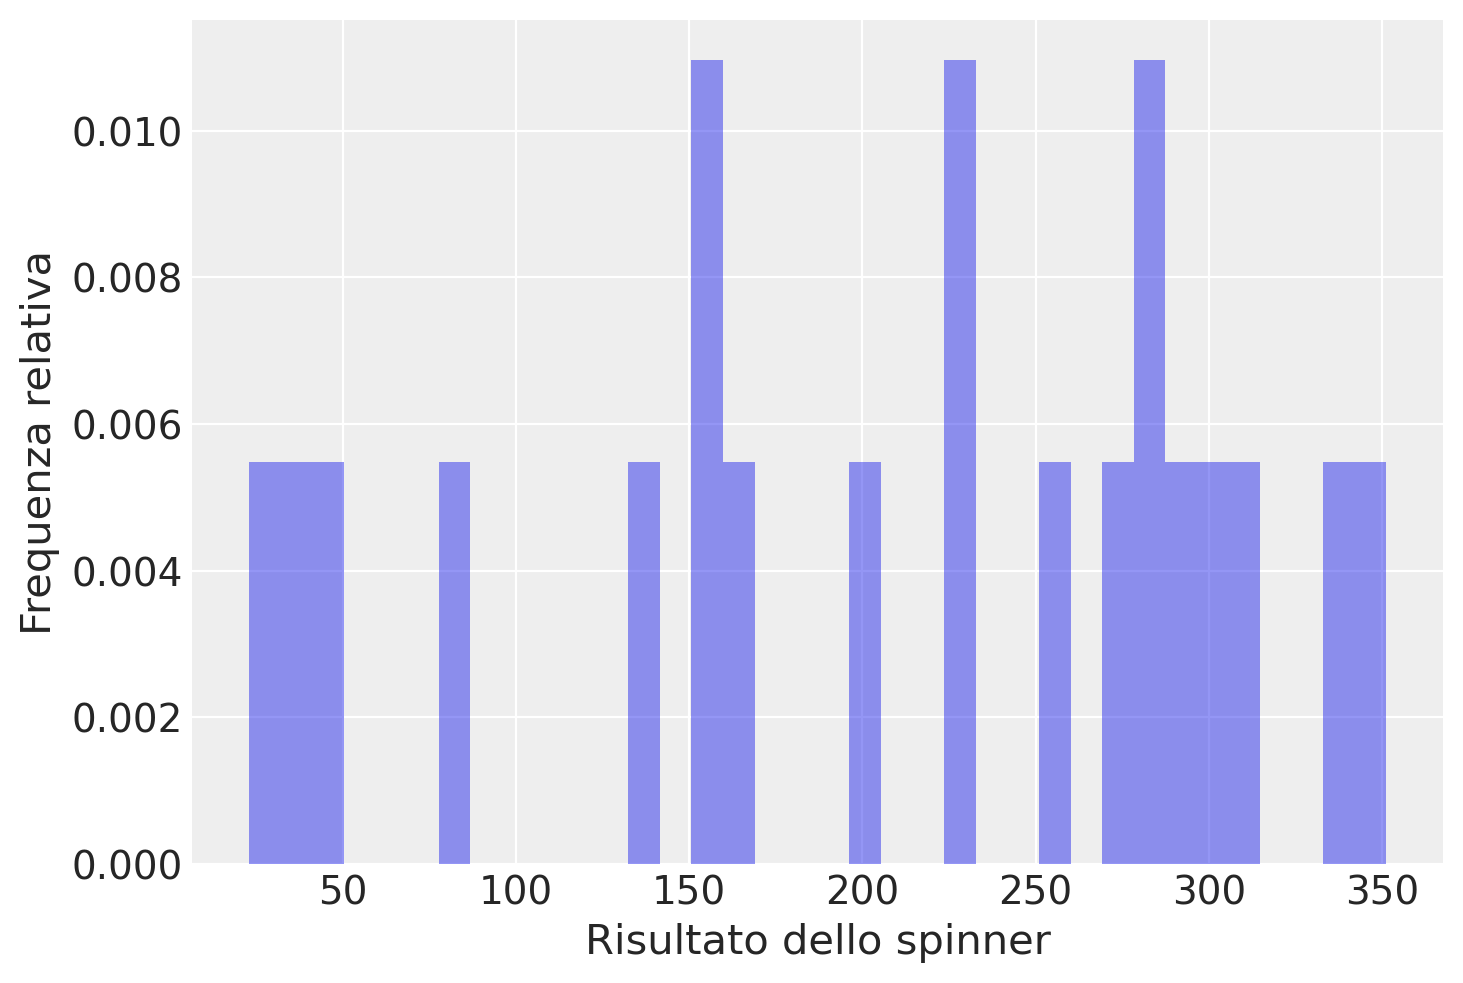

In [6]:
plt.figure()
count, bins, ignored = plt.hist(y, bins=36, density=True, alpha=0.5)
plt.xlabel("Risultato dello spinner")
plt.ylabel("Frequenza relativa");

Sebbene possiamo pensare che sia ugualmente probabile che si verifichi qualsiasi risultato tra 0 e 360, l'istogramma non sembra suggerire questo. Ma lo spinner è stato fatto ruotare solo 20 volte. Proviamo con 100,000 ripetizioni. 

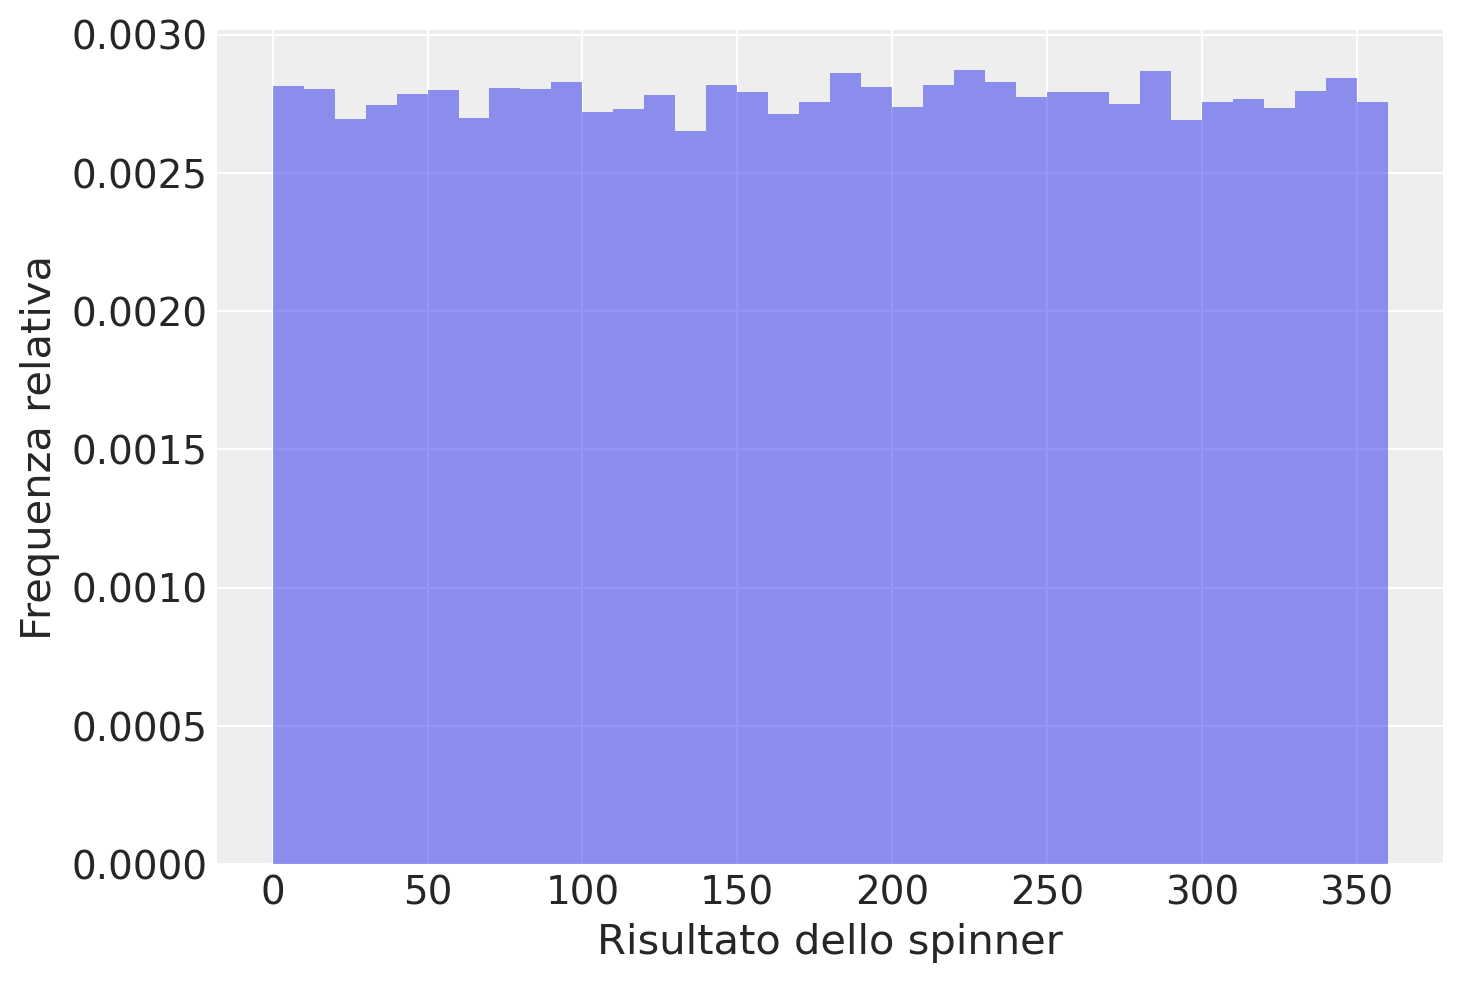

In [9]:
plt.figure()
count, bins, ignored = plt.hist(rng.uniform(0, 360, 100000), bins=36, density=True, alpha=0.5)
plt.xlabel("Risultato dello spinner")
_ = plt.ylabel("Frequenza relativa")

In questo caso, anche se c'è una variazione nelle altezze delle barre (con $\Delta$ = 10), la forma generale dell'istogramma sembra essere piuttosto piatta, ovvero uniforme, nell'intero intervallo dei valori possibili di $X$, ovvero $0 <= X <= 360$. Se potessimo ottenere un numero enorme di risultati dello spinner, il profilo dell'istogramma assumerebbe la forma della *funzione di densità uniforme* mostratra nella figura seguente.

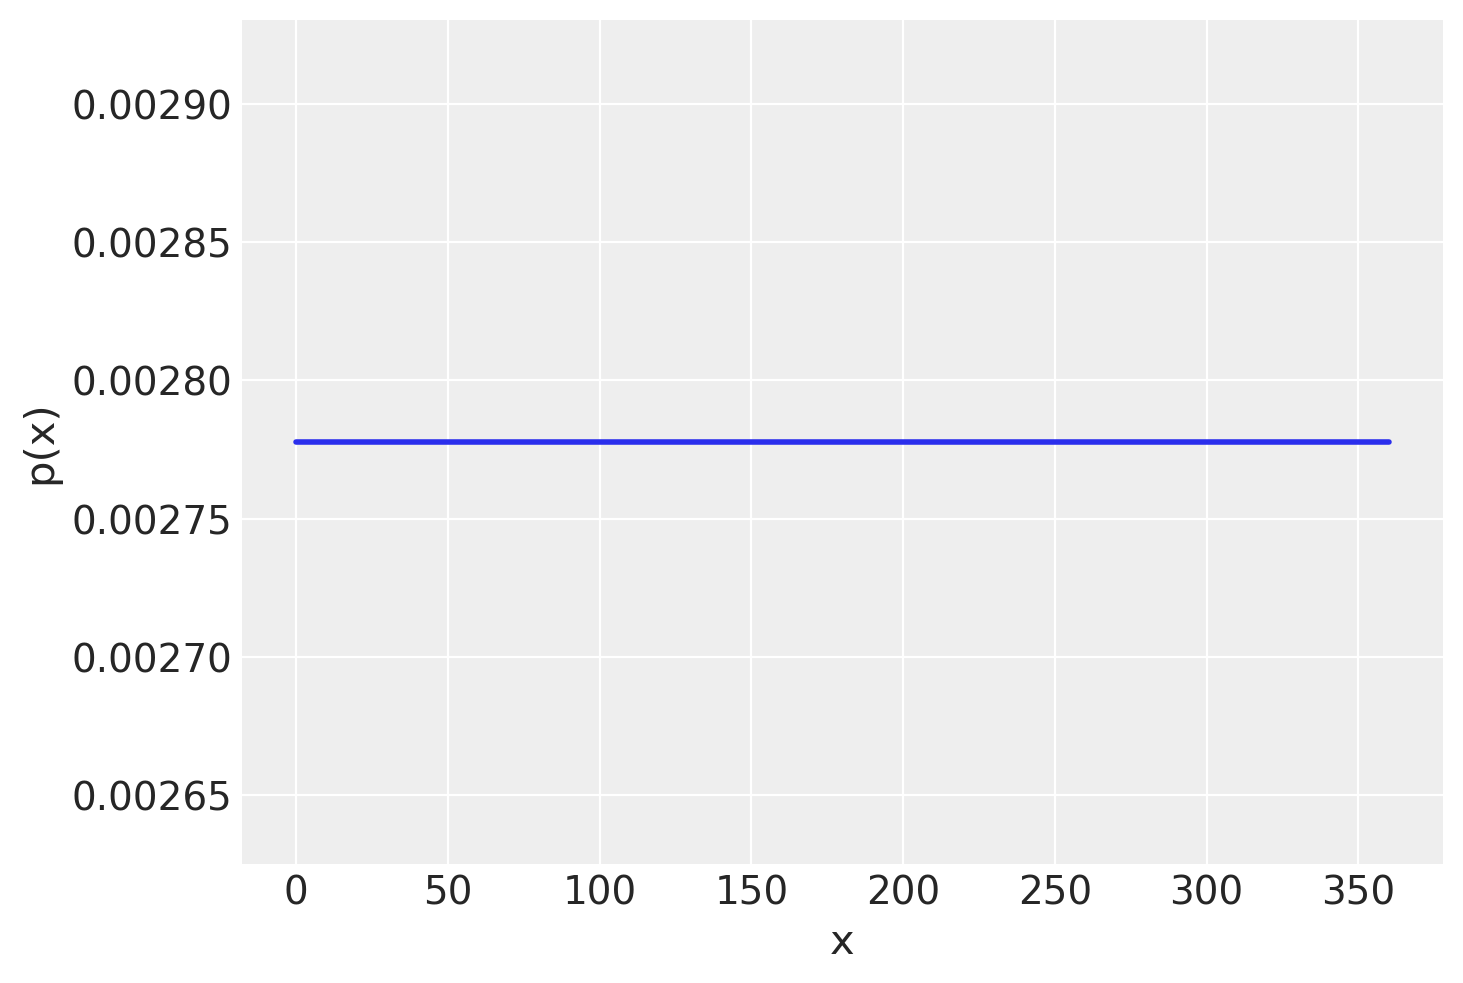

In [10]:
plt.figure()
x = np.linspace(0, 360, 100)
plt.plot(x, stats.uniform.pdf(x, 0, 360), lw=2, label="uniform pdf")
plt.xlabel("x")
plt.ylabel("p(x)");

Quando la variabile casuale $X$ è continua, come nel caso del risultato della rotazione dello spinner, allora per rappresentare le probabilità usiamo una curva chiamata funzione di densità di probabilità. Poiché la scala dello spinner va da 0 a 360, sappiamo che tutti i risultati possibili devono cadere in questo intervallo, quindi la probabilità che $X$ assuma un valore nell'intervallo [0, 360] è 1.0. Questa probabilità è rappresentata dall'area totale sotto la funzione di densità della figura precedente tra 0 e 360. Poiché l'area di questo rettangolo è data dall'altezza per la base e la base è uguale a 360, l'altezza di questa curva di densità deve essere 1/360 = 0.00278. L'ordinata della funzione di densità (qui 0.00278 nell'intervallo [0, 360] e 0 altrove) è chiamata *densità*.

Le probabilità corrispondono alle aree sottese alla curva di densità nell'intervallo di valori $X$ specificato. Per esempio, nell'esperimento dello spinner possiamo chiederci quale sia la probabilità di ottenere un numero compreso tra 150 e 250, ovvero $P(150 < X < 250)$. Per trovare la risposta dobbiamo calcolare l'area di un rettangolo. La base è 250 - 150 = 100.  L'altezza è 0.00278. Dunque, la probabilità è

In [12]:
100*1/360

0.2777777777777778

Per svolgere questo calcolo i software utilizzano la funzione di ripartizione, $P(X < x)$. Per trovare l'area in un intervallo è necessario sottrarre due aree. Nel caso presente abbiamo $P(x < 250) - P(x < 150)$, ovvero:

In [11]:
stats.uniform.cdf(250, 0, 360) - stats.uniform.cdf(150, 0, 360)

0.27777777777777773

La probabilità cercata è rappresentata dal rettangolo indicato nella figura seguente.

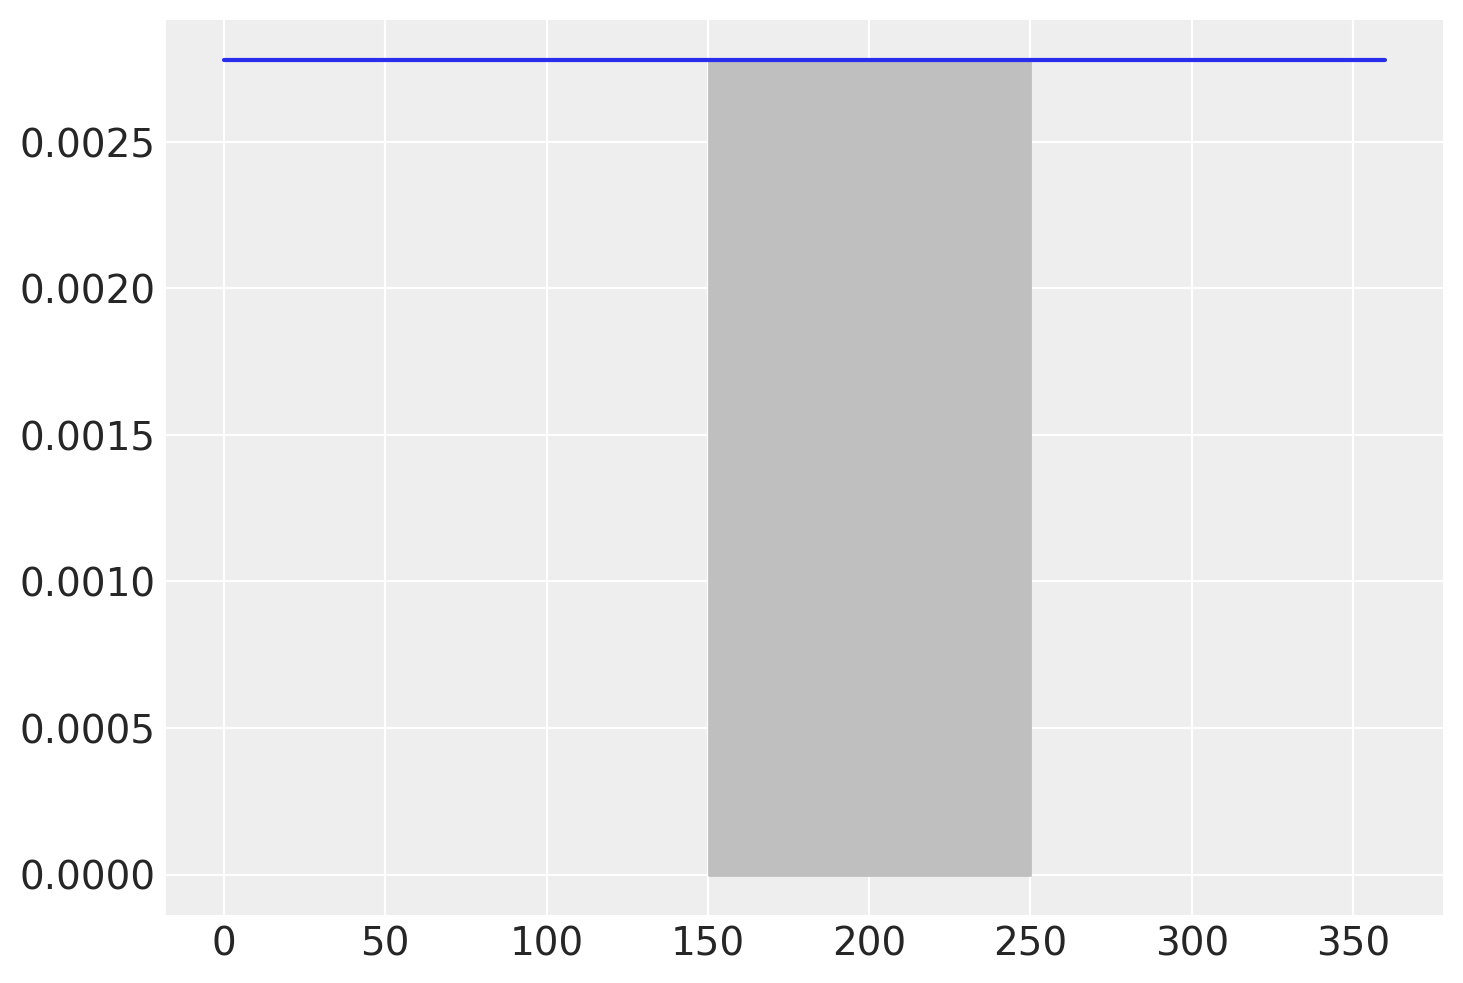

In [12]:
plt.figure()
x = np.linspace(0, 360, 1000)
fx = stats.uniform.pdf(x, 0, 360)
plt.plot(x, fx)
plt.fill_between(x, fx, where=(x >= 150) & (x <= 250), color="0.75");

In maniera più formale possiamo dire che la distribuzione continua uniforme è una distribuzione di probabilità continua che assegna lo stesso grado di fiducia a tutti i possibili valori di una variabile definita in un certo intervallo $S=[a,b]\subset {\mathbb  {R}}$. La distribuzione continua uniforme viene indicata con ${\mathcal  {U}}(a,b)={\mathcal  {U}}([a,b])$. Come intervallo $[a,b]$ viene spesso preso l'intervallo unitario $I=[0,1]$.

La densità di probabilità di una variabile casuale continua uniforme ${\mathcal  {U}}(a,b)$ è

$$
f(x)={\frac  {1}{b-a}} \quad \text{su}\; [a, b].
$$

Il suo valore attesto è

$$
\displaystyle E(X)={\frac {1}{2}}(b+a).
$$

La sua varianza è

$$
V(X)={\frac {1}{12}}(b-a)^{2}.
$$

In Python è possibile manipolare la distribuzione uniforme mediante la funzione `uniform` del modulo `scipy.stats`.  Di default, la funzione `scipy.stats.uniform()` è un'istanziazione di ${\mathcal{U}}(0,1)$. Se utilizziamo la funzione `pdf()` (*probability density function*) otteniamo l'ordinata della funzione di densità ${\mathcal{U}}(0,1)$ in corrispondenza dei valori $x$ passati in input. Per esempio, esaminiamo la funzione di densità ${\mathcal{U}}(0,1)$ in corrispondenza di 0.5, 0.8 e 1.2. Per i primi due valori ci aspettiamo di ottenere 1; in corrispondenza di 1.2 ci aspettiamo di ottenere 0, poiché questo valore è al di fuori dell'intervallo $[ 0, 1]$.

In [11]:
stats.uniform.pdf([0.5, 0.8, 1.2])

array([1., 1., 0.])

Con la funzione `cdf()` (*cumulative density function*) otteniamo la funzione di ripartizione. Per esempio, per ${\mathcal{U}}(0,1)$ in corrispondenza dei punti 0.5 e 0.8 otteniamo

In [16]:
stats.uniform.cdf([0.5, 0.8])

array([0.5, 0.8])

Usando la funzione di ripartizione è possibile calcolare la probabilità che la variabile casuale continua assuma un valore nell'intervallo specificato. Per esempio, per ${\mathcal{U}}(0,1)$ troviamo $P(0.5 < x < 0.8)$ 

In [13]:
stats.uniform.cdf(0.8) - stats.uniform.cdf(0.5)

0.30000000000000004

I quantili di una funzione di densità (ovvero, il valore della variabile casuale $X$ in corrispondenza del valore della funzione di ripartizione fornito in input) si ottengono con la funzione `ppf()` (*probability point function*). Per esempio, troviamo i quantili di ordine 0.5 e 0.8 di una ${\mathcal  {U}}(0,1)$.

In [14]:
stats.uniform.ppf([0.5, 0.8])

array([0.5, 0.8])

Infine, è possibile simulare dei valori casuali della distribuzione ${\mathcal{U}}(0,1)$ usando la funzione `stats.uniform()`. Se vogliamo 5 valori da una ${\mathcal{U}}(0,1)$, scriviamo:

In [13]:
rng.uniform(0, 1, 5)

array([0.51383373, 0.32883263, 0.16402071, 0.13786892, 0.15572435])

Verifico il valore atteso di 100,000 realizzazioni di ${\mathcal {U}}(0,1)$.

In [14]:
rng.uniform(0, 1, 100000).mean()

0.4993283752250098

Verifico la varianza di 100,000 realizzazioni di ${\mathcal  {U}}(0,1)$.

In [15]:
rng.uniform(0, 1, 100000).var()


0.0832097723457758

In [16]:
1 / 12

0.08333333333333333

## Distribuzione esponenziale

Un'altra distribuzione di densità molto semplice è la distribuzione esponenziale. La distribuzione esponenziale viene spesso utilizzata per modellare il tempo trascorso prima che un evento si verifichi (tempo di attesa). 

La distribuzione esponenziale è l'unica distribuzione di probabilità continua che possiede la proprietà di assenza di memoria. Ad esempio, ipotizziamo che il tempo necessario affinché un bicchiere da vino si rompa dopo il primo utilizzo segua una distribuzione esponenziale. Supponiamo inoltre che ci sia un bicchiere da vino che non si è rotto dopo 3 anni dal primo utilizzo. L'assenza di memoria significa che la probabilità che questo bicchiere da vino non si rompa nel prossimo anno è la stessa della probabilità che un altro bicchiere da vino nuovo non si rompa nel primo anno di utilizzo.

Chiamiamo $X$ il tempo di attesa. Sia $\mu = \mathbb{E}(X)$ il tempo di attesa medio. La funzione di densità esponenziale è

$$
f(x) = \lambda {\rm e}^{-\lambda x}, \quad \text{con} \; \lambda = 1/\mu,\, \lambda > 0,\, x > 0,
$$ {#eq-exponential-pdf}

ovvero

$$
f(x) = \frac{1}{\mu} {\rm e}^{-x/\mu}.
$$ 


La media di una distribuzione esponenziale è

$$
E(X) = \frac{1}{\lambda}.
$$

La varianza di una distribuzione esponenziale è

$$
V(X) = \mu = \frac{1}{\lambda^2}.
$$

La deviazione standard è dunque uguale alla media:

$$
\sigma_X = \frac{1}{\lambda} = \mu.
$$

Ad esempio, il tempo di attesa della pubblicazione del voto di un esame scritto segue una distribuzione esponenziale. Supponiamo che, in questo Corso di Laurea, il tempo di attesa medio per conoscere il risultato di un esame scritto sia di 4 giorni. La funzione esponenziale diventa

$$
f(x) = \frac{1}{4} \exp^{-x/4}.
$$ 

Per disegnare un grafico della funzione esponenziale possiamo usare la funzione `stats.expon()`. La densità è data da `pdf(x, loc, scale)`, laddove il parametro `loc` è 0 e `scale` è la deviazione standard. Nel caso presente abbiamo:

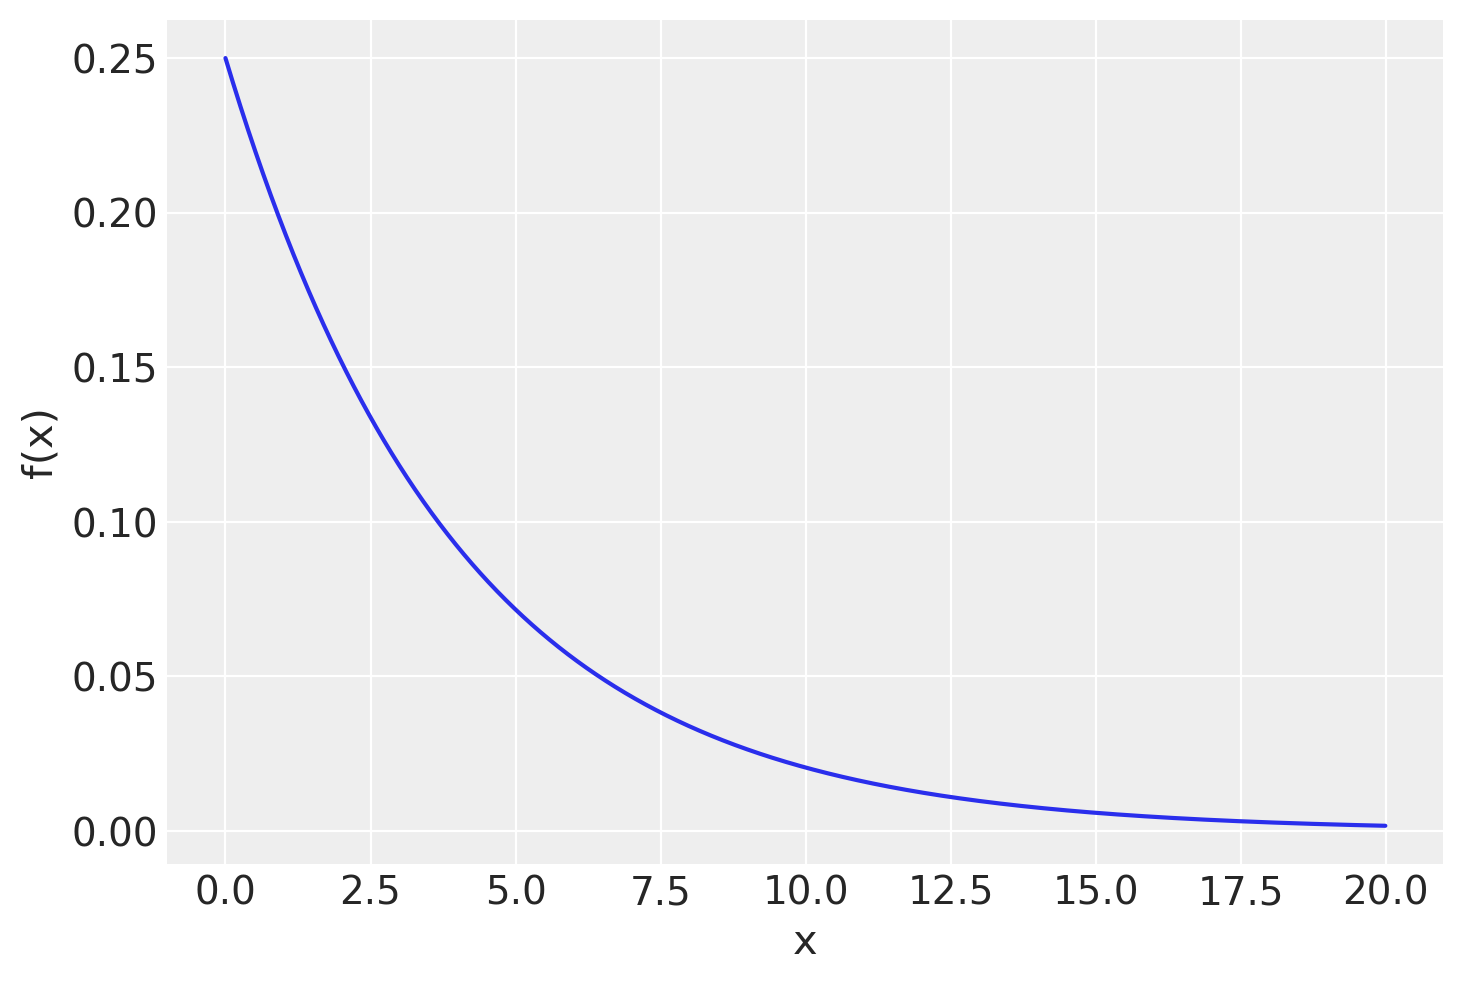

In [17]:
x = np.arange(0, 20, 0.01)
mu = 4
lam = 1 / mu
stdev = 1 / lam
pdf = stats.expon.pdf(x, loc=0, scale=stdev)

plt.figure()
plt.plot(x, pdf)
plt.xlabel("x")
plt.ylabel("f(x)");

Chiediamoci, ad esempio, quale sia la probabilità di dovere aspettare non più di un giorno e mezzo per conoscere il voto dell'esame. La risposta a questa domanda è data dalla funzione di ripartizione in corrispondenza di 1.5, ovvero $F(1.5) = P(X \leq 1.5)$. 

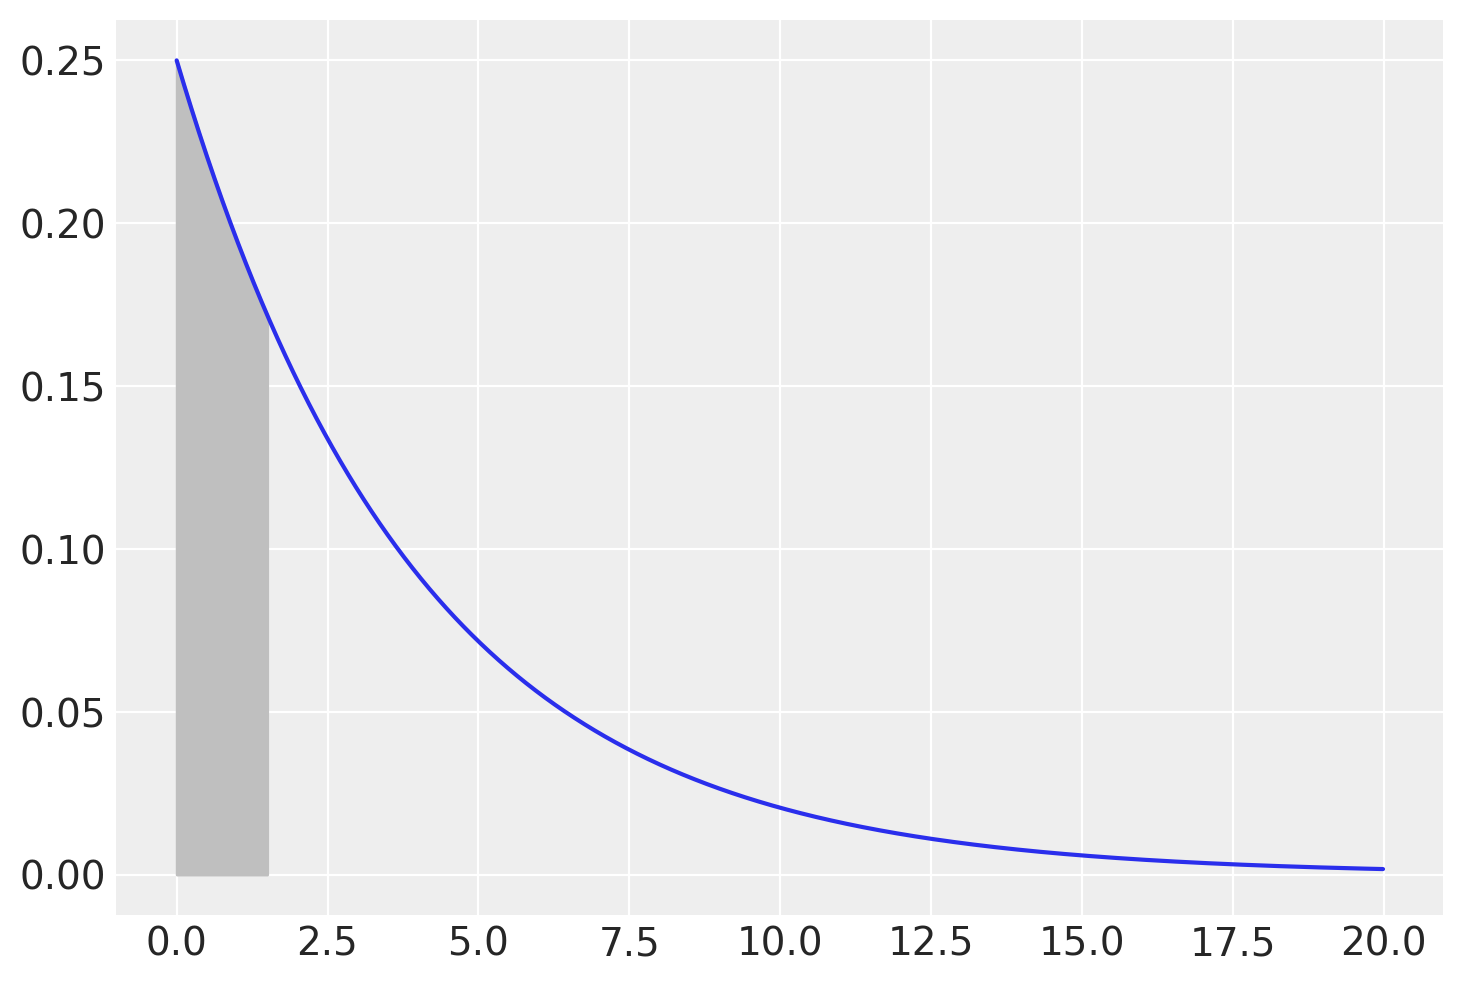

In [18]:
fx = stats.expon.pdf(x, loc=0, scale=stdev)

plt.figure()
plt.plot(x, fx)
plt.fill_between(x, fx, where=(x >= 0) & (x <= 1.5), color="0.75");

Possiamo trovare la risposta usando la funzione `cdf()`:

In [19]:
stats.expon.cdf(1.5, loc=0, scale=stdev) 

0.3127107212090278

Chiediamoci, ad esempio quale sia la probabilità di conoscere il voto in un tempo compreso tra 1 e 6 giorni. Dobbiamo trovare l'area sottesa alla funzione di densità nell'intervallo [1, 6]. Usando la fuzione di ripartizione, calcoliamo $F(6) - F(1) = P(X <= 6) - P(X <= 1)$.

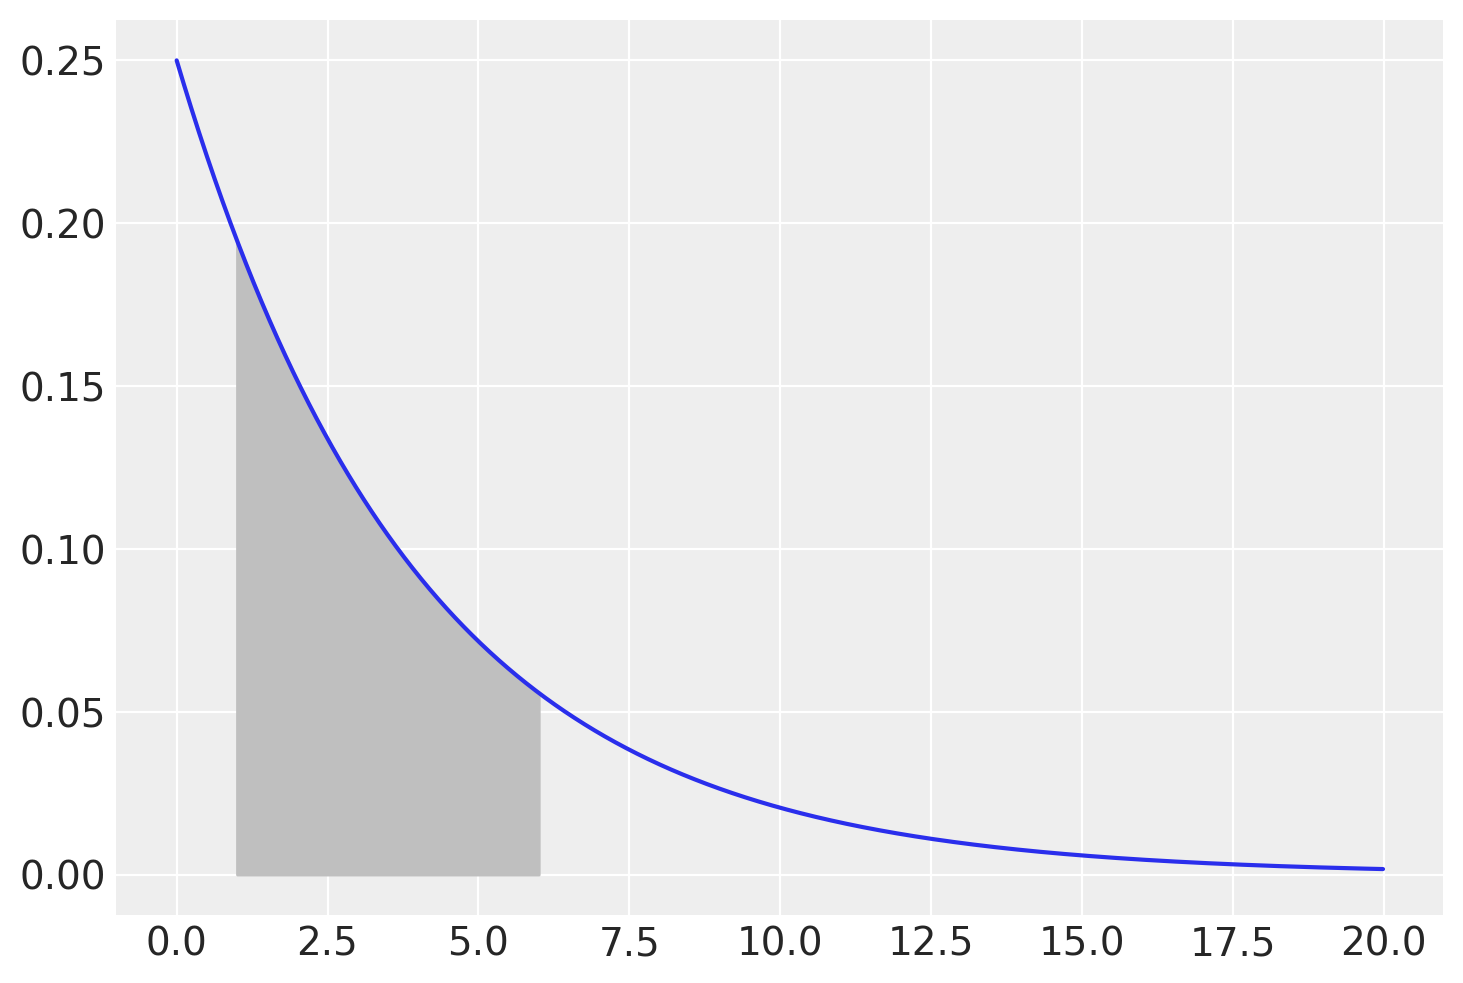

In [20]:
fx = stats.expon.pdf(x, loc=0, scale=stdev)

plt.figure()
plt.plot(x, fx)
plt.fill_between(x, fx, where=(x >= 1) & (x <= 6), color="0.75");

In [21]:
stats.expon.cdf(6, loc=0, scale=stdev) - stats.expon.cdf(1, loc=0, scale=stdev)

0.5556706229229751

Troviamo la probabilità di dovere aspettare almeno 5 giorni e mezzo. 

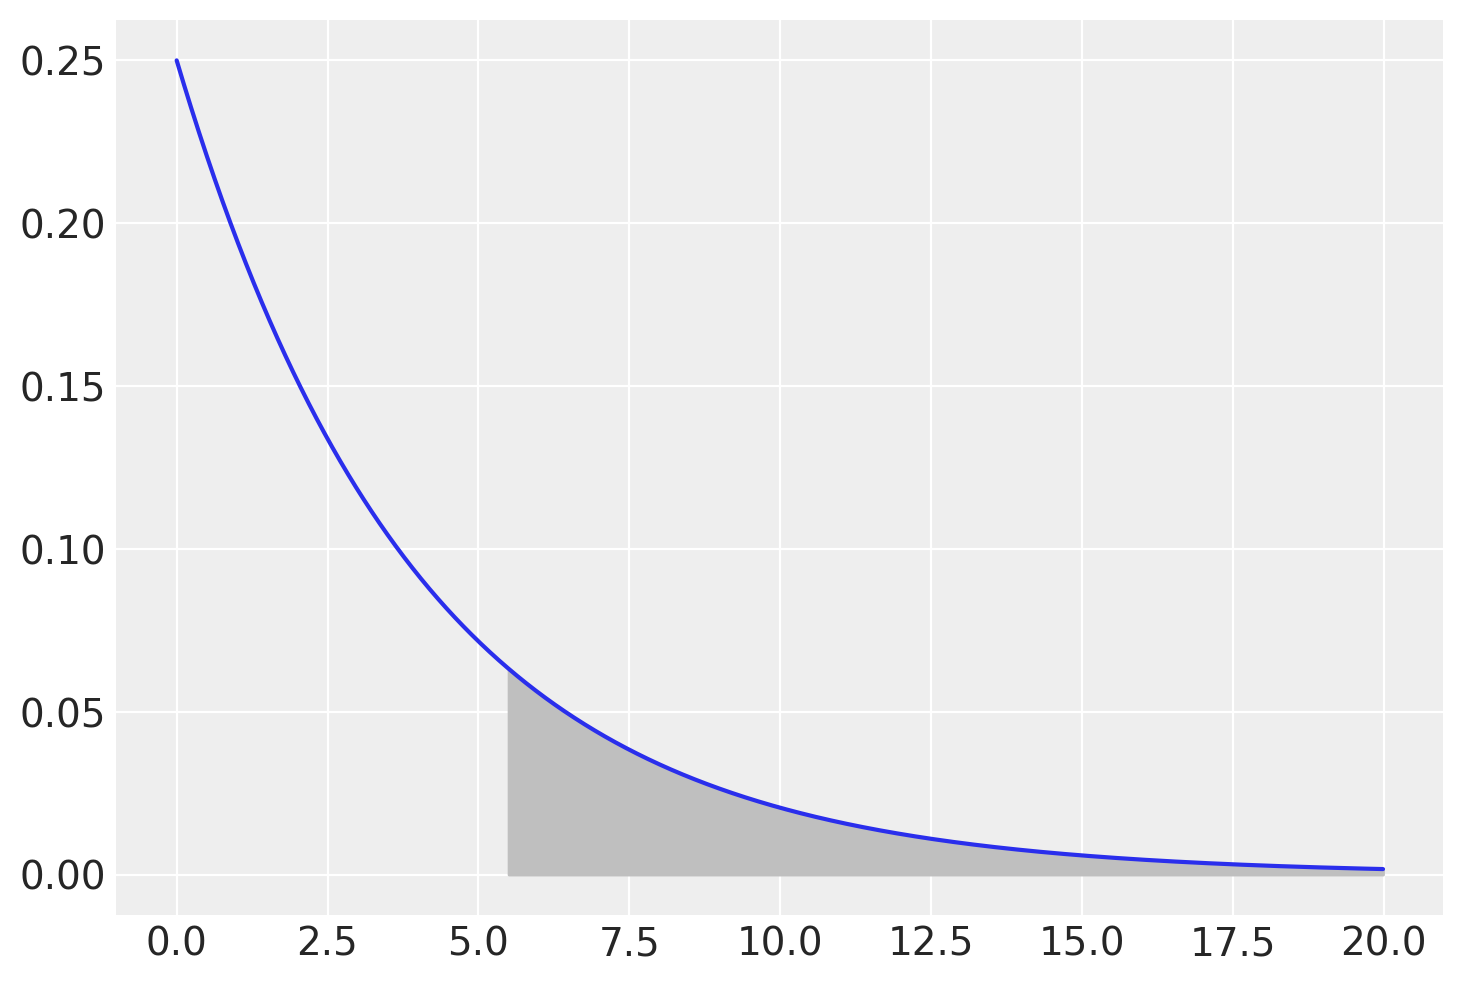

In [22]:
fx = stats.expon.pdf(x, loc=0, scale=stdev)

plt.figure()
plt.plot(x, fx)
plt.fill_between(x, fx, where=(x >= 5.5) & (x <= 21), color="0.75");

La probabilità cercata è data dalla probabilità dell'evento complementare di quello fornito dalla funzione di ripartizione.

In [23]:
1 - stats.expon.cdf(5.5, loc=0, scale=stdev) 

0.25283959580474646

In [24]:
stats.expon.sf(5.5, loc=0, scale=stdev) 

0.25283959580474646

Se la media del tempo di attesa nel Corso di Laurea fosse di 4 giorni, allora circa una volta su 4 lo studente dovrà aspettare almeno 5.5 giorni per conoscere il voto dello scritto.

La figura seguente mostra un istogramma di 1000000 valori casuali estratti dalla distribuzione esponenziale di parametro $\lambda = 1/4$. All'istogramma è sovrapposta la funzione di densità.

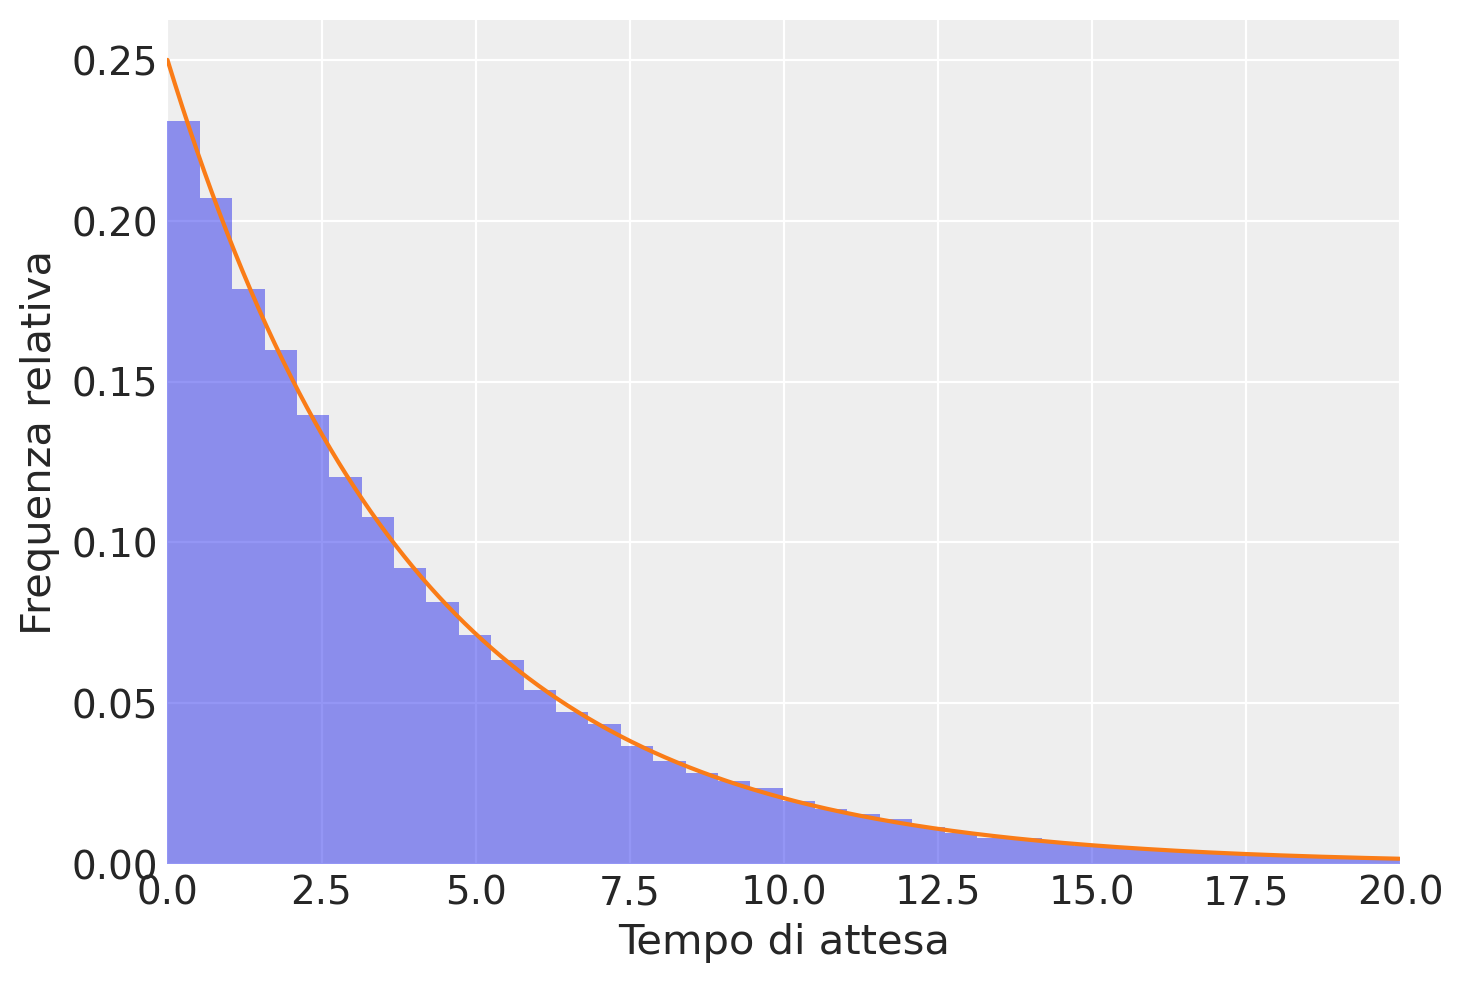

In [28]:
samps = rng.exponential(stdev, 100000)

plt.figure()
count, bins, ignored = plt.hist(samps, bins=100, density=True, alpha=0.5)
plt.plot(x, fx)
plt.xlim([0, 20])
plt.ylabel("Frequenza relativa")
plt.xlabel("Tempo di attesa");

## Distribuzione Gaussiana

La più importante distribuzione di densità è la Gaussiana. Non c'è un'unica distribuzione gaussiana (o Normale): la distribuzione gaussiana è una famiglia di distribuzioni. Tali distribuzioni sono dette "gaussiane" in onore di Carl Friedrich Gauss (uno dei più grandi matematici della storia il quale, tra le altre cose, scoprì l'utilità di tale funzione di densità per descrivere gli errori di misurazione). Adolphe Quetelet, il padre delle scienze sociali quantitative, fu il primo ad applicare tale funzione di densità alle misurazioni dell'uomo. Karl Pearson usò per primo il termine "distribuzione normale" anche se ammise che questa espressione "ha lo svantaggio di indurre le persone a credere che le altre distribuzioni, in un senso o nell'altro, non siano normali."

### Limite delle distribuzioni binomiali

Iniziamo con un un breve excursus storico. Nel 1733, Abraham de Moivre notò che, aumentando il numero di prove di una distribuzione binomiale, la distribuzione risultante diventava quasi simmetrica e a forma campanulare. Per esempio, con 10 prove e una probabilità di successo di 0.9, la distribuzione è chiaramente asimmetrica.

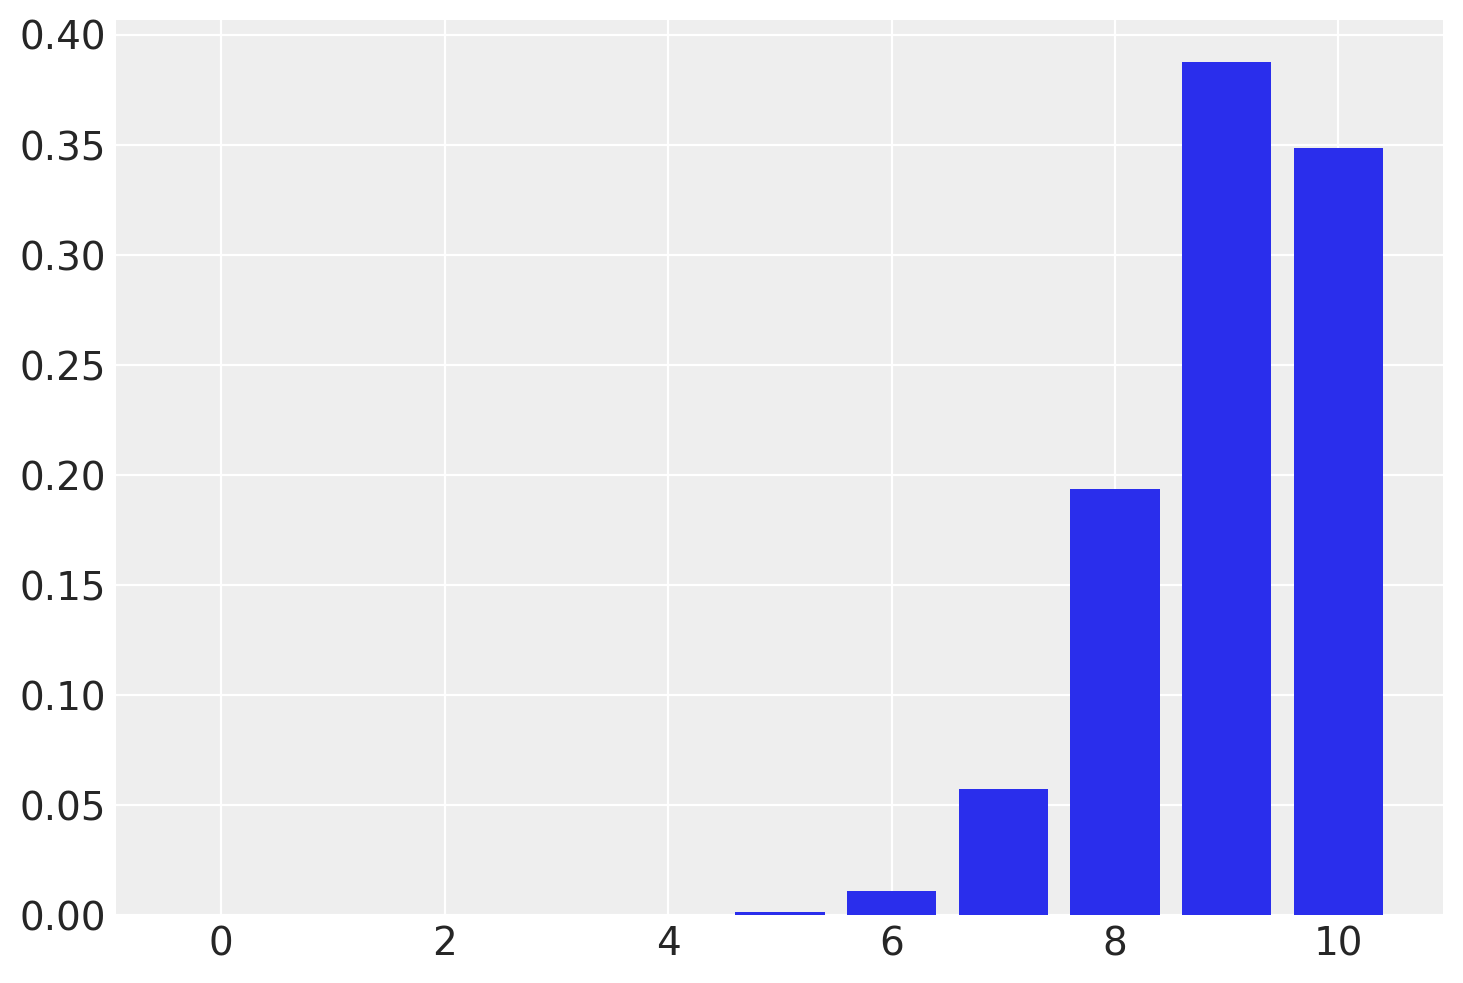

In [29]:
n = 10
p = 0.9
r_values = list(range(n + 1))
dist = [stats.binom.pmf(r, n, p) for r in r_values]

plt.figure()
plt.bar(r_values, dist);

Quando il numero di prove *N* viene aumentato di un fattore di 100 a *N* = 1000, mantenendo costante la probabilità di successo del 90%, si osserva che la distribuzione assume una forma campanulare quasi simmetrica. Questa osservazione porta a una scoperta di de Moivre: quando *N* diventa grande, la funzione gaussiana, nonostante rappresenti la densità di variabili casuali continue, offre una buona approssimazione alla funzione di massa di probabilità binomiale.

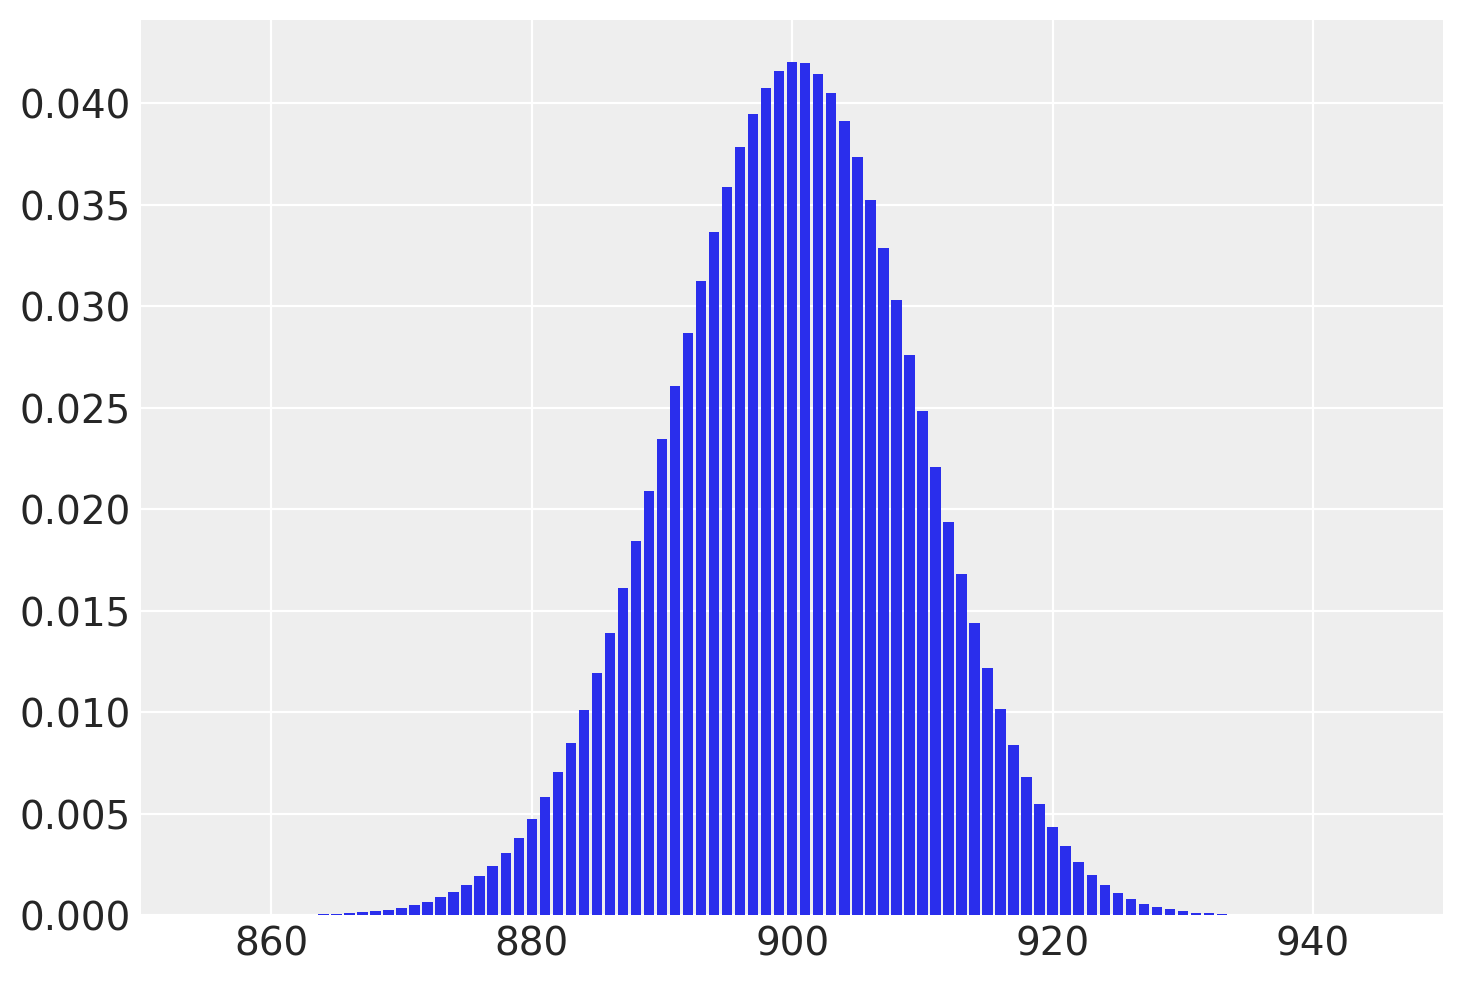

In [30]:
n = 1000
p = 0.9
r_values = list(range(n + 1))
dist = [stats.binom.pmf(r, n, p) for r in r_values]

plt.figure()
plt.bar(r_values, dist)
plt.xlim(850, 950);

La distribuzione Normale fu scoperta da Gauss nel 1809. Il Paragrafo successivo illustra come si possa giungere alla Normale mediante una simulazione.

## La Normale prodotta con una simulazione

Il libro "Rethinking Statistics" di @McElreath_rethinking spiega come sia possibile ottenere la distribuzione normale attraverso una simulazione. Immaginiamo di avere duemila persone che si trovano allineate su una linea di partenza. Quando viene dato il segnale di partenza, ogni persona lancia una moneta e compie un passo avanti o indietro a seconda del risultato del lancio. La lunghezza di ogni passo può variare da 0 a 1 metro. Ogni persona lancia la moneta 16 volte e quindi compie 16 passi.

I risultati ottenuti da una serie di passeggiate casuali si traducono in varie distanze dall'origine, che è il punto da cui si parte, contrassegnato come zero, dopo un numero specificato di passi. Queste distanze sono rappresentate numericamente. Al termine di queste passeggiate, non è possibile determinare la posizione esatta di ogni individuo, ma è possibile descrivere accuratamente le caratteristiche della distribuzione delle 1000 distanze dall'origine.

Ad esempio, è possibile prevedere con precisione la frazione di individui che si sono mossi verso in avanti o indietro, o la proporzione di persone che si troveranno a una distanza specifica dal punto di partenza, come a 1.5 metri dall'origine. Queste previsioni sono fattibili perché la distribuzione delle distanze segue una distribuzione Normale.

Il codice presentato di seguito genera passeggiate casuali utilizzando un generatore di numeri casuali e ne traccia i percorsi risultanti. Il codice inizia inizializzando un oggetto generatore di numeri casuali con la funzione `np.random.default_rng()` della libreria `numpy`. Questo generatore sarà usato per produrre numeri casuali uniformemente distribuiti tra -1 e 1, simulando così il lancio di una moneta.

La variabile `steps` specifica il numero di passi per ogni passeggiata casuale, mentre `repetitions` indica il numero di passeggiate da generare. La variabile `show_steps` è un elenco di numeri di passi in cui il codice traccerà linee verticali sul grafico.

Successivamente, il codice crea un array bidimensionale di NumPy chiamato `x` con righe pari a `steps + 1` e colonne pari a `repetitions`. La prima colonna di questo array è riempita di zeri, e le colonne rimanenti sono riempite con la somma cumulativa dei passi, ottenuti da numeri casuali uniformemente distribuiti generati dal generatore di numeri casuali. Questo array verrà utilizzato per memorizzare le posizioni della passeggiata casuale ad ogni passo.

Il codice poi prepara una figura per tracciare tutte le passeggiate casuali. Il codice traccia anche la prima passeggiata casuale in nero.

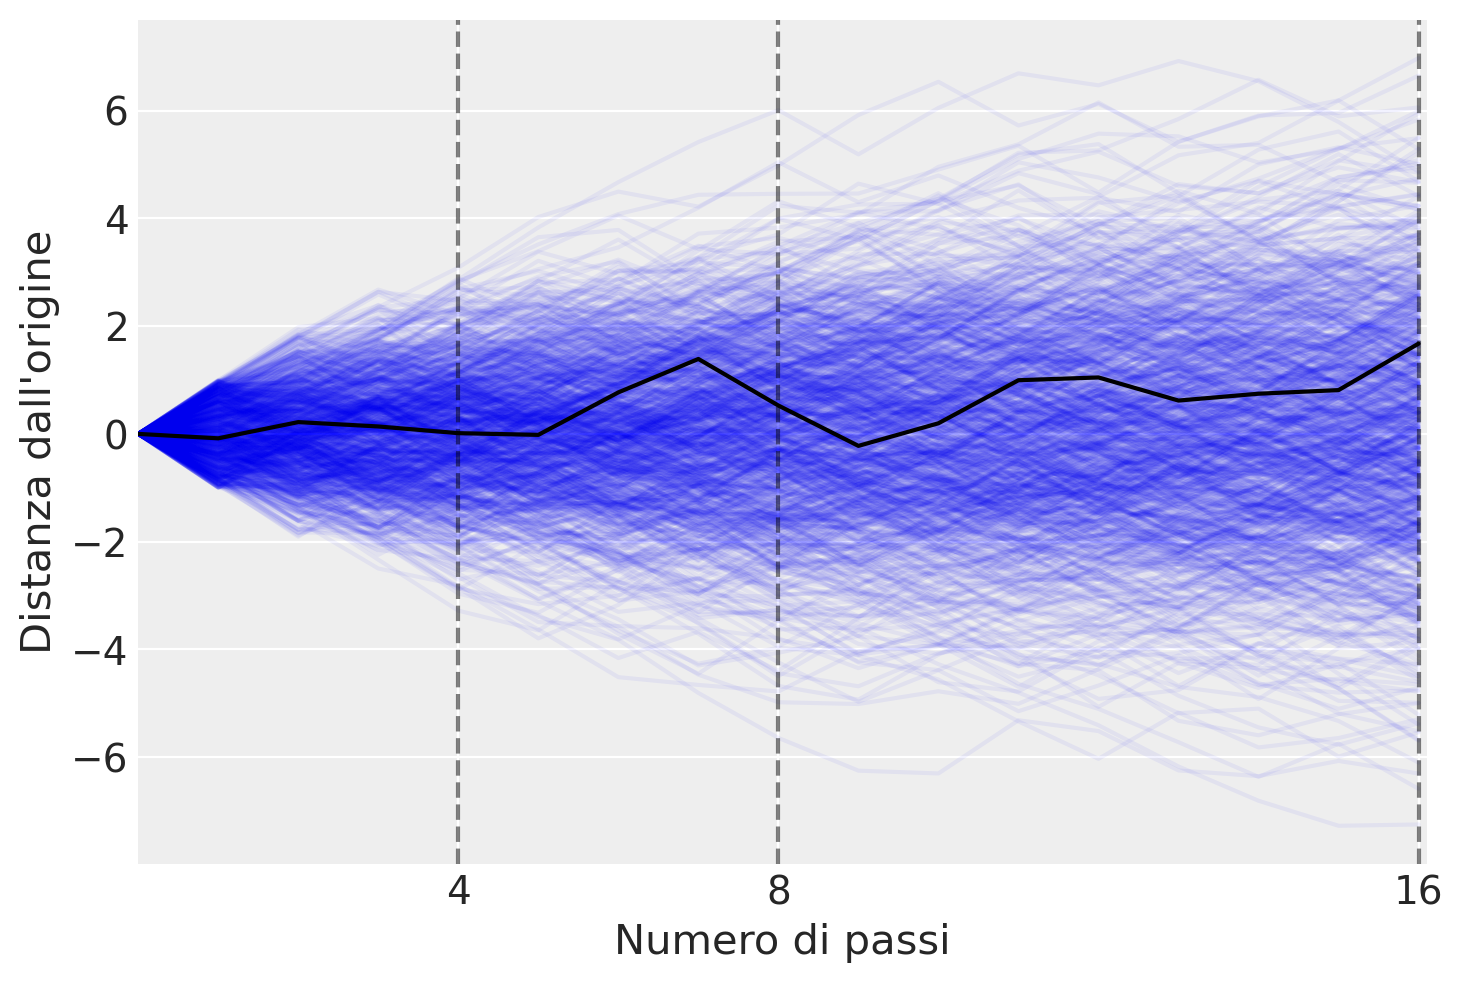

In [32]:
# Parametri della simulazione
numero_passi = 16  # Numero di passi per passeggiata
ripetizioni = 1000  # Numero di passeggiate da generare
punti_da_evidenziare = [4, 8, 16]  # Punti da evidenziare sul grafico

# Inizializza l'array per registrare le passeggiate casuali
x = np.zeros((numero_passi + 1, ripetizioni))

# Genera le passeggiate casuali
for i in range(ripetizioni):
    passi = rng.uniform(-1, 1, numero_passi)  # Genera passi casuali
    x[1:, i] = np.cumsum(passi)  # Calcola la posizione cumulativa

# Prepara il grafico
fig, ax = plt.subplots()
plt.plot(x, color="blue", alpha=0.05)  # Disegna tutte le passeggiate
plt.plot(x[:, 0], color="black")  # Evidenzia la prima passeggiata

# Evidenzia i punti specifici
for punto in punti_da_evidenziare:
    plt.axvline(punto, linestyle="--", color="black", alpha=0.5)

# Imposta etichette e aspetti del grafico
plt.xlabel("Numero di passi")
plt.ylabel("Distanza dall'origine")
ax.set_xticks(punti_da_evidenziare)
plt.xlim(0, numero_passi + 0.1)

# Mostra il grafico
plt.show()

Il grafico riportato qui sotto visualizza la distribuzione dei passi a partire dalla linea mediana dopo 4, 8 e 16 lanci di moneta/passi. Quello che si nota è che, man mano che procediamo nel numero di passi, le densità iniziano a somigliare alla curva a campana associata alle distribuzioni Gaussiane.

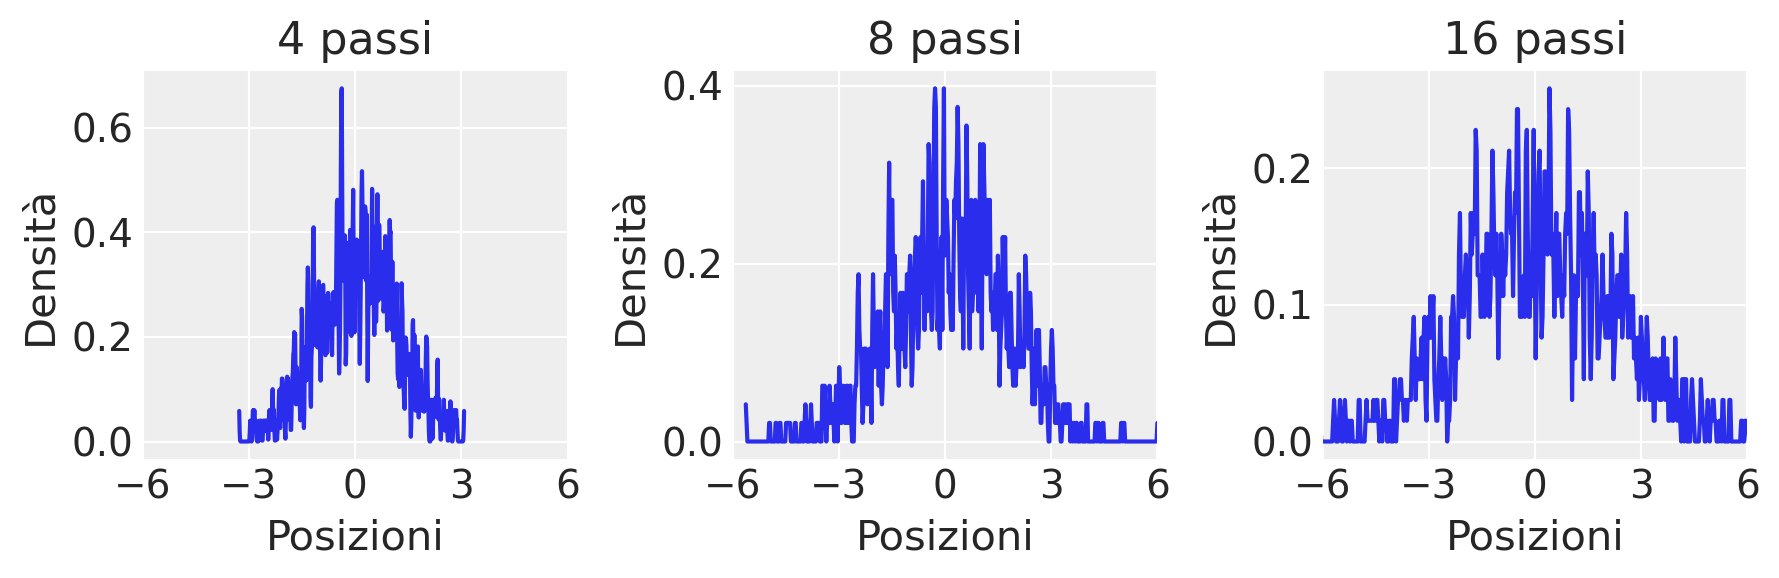

In [33]:
# Crea una figura con 3 subplots in orizzontale, condividendo l'asse X
fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharex=True)

# Itera sui punti da evidenziare e sugli assi corrispondenti
for step, ax in zip(punti_da_evidenziare, axs):
    # Estrae le posizioni al passo specificato per tutte le ripetizioni
    posizioni_al_passo = x[step, :]
    
    az.plot_kde(posizioni_al_passo, bw=0.01, ax=ax)
    
    ax.set_title(f"{step} passi")
    ax.set_ylabel("Densità")
    ax.set_xlabel("Posizioni")
    ax.set_xlim(-6, 6)
    ax.set_xticks([-6, -3, 0, 3, 6])

plt.tight_layout() 
plt.show()

La chiarezza dell'informazione presentata nei grafici precedenti può essere migliorata utilizzando un KDE plot.

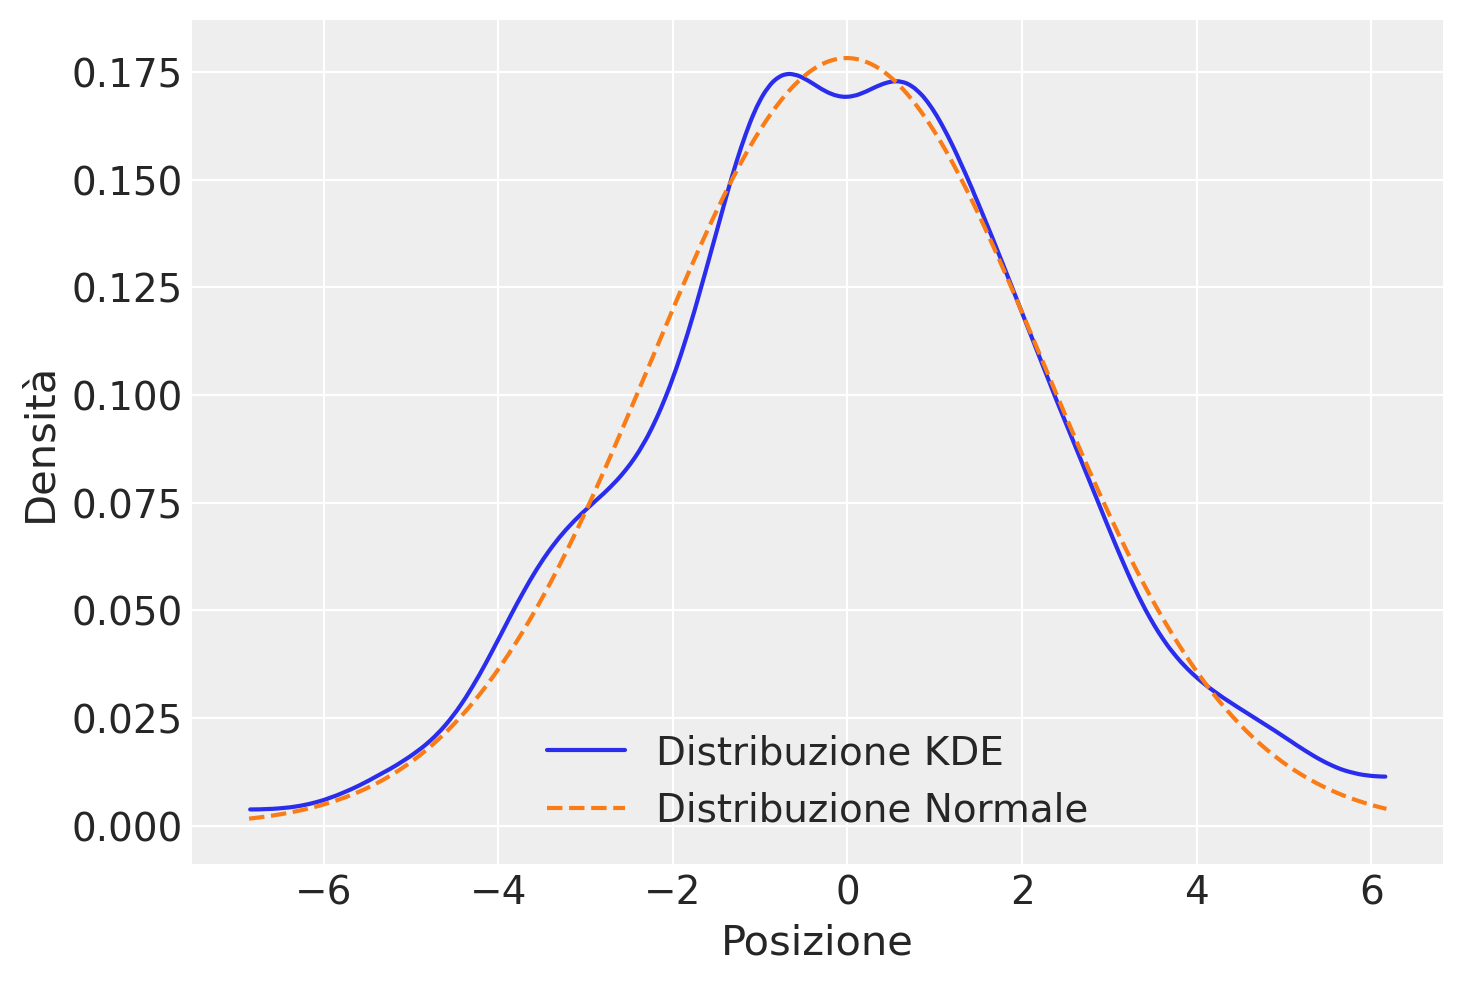

In [36]:
# Genera la distribuzione uniforme e calcola la somma come prima
pos = rng.uniform(-1, 1, size=(16, 1000)).sum(0)

# Calcola media e deviazione standard dei dati generati
media, dev_std = np.mean(pos), np.std(pos)

# Spazio dei valori per la distribuzione normale
valori = np.linspace(np.min(pos), np.max(pos), 1000)

# Calcola la distribuzione normale con la stessa media e deviazione standard
distribuzione_normale = stats.norm.pdf(valori, media, dev_std)

# Disegna la stima della densità kernel dei dati
az.plot_kde(pos, label='Distribuzione KDE')

# Sovrappone la distribuzione normale
plt.plot(valori, distribuzione_normale, label='Distribuzione Normale', color = "C1", linestyle='--')

plt.xlabel("Posizione")
plt.ylabel("Densità")
_ = plt.legend()

Questa simulazione in luce un principio fondamentale della teoria delle probabilità: ogni processo che coinvolge la somma di una sequenza di valori casuali, tutti estratti dalla stessa distribuzione, inevitabilmente tende verso una distribuzione normale, comunemente conosciuta come curva gaussiana. Questa tendenza si verifica indipendentemente dalla configurazione iniziale della distribuzione di partenza, che può essere uniforme, come nell'esempio menzionato, o di qualsiasi altro tipo. La forma specifica della distribuzione iniziale influisce sulla velocità con cui si verifica questa convergenza verso il comportamento gaussiano, con variazioni significative nella velocità di convergenza: alcuni processi possono manifestare una convergenza lenta, mentre altri possono convergere estremamente rapidamente. Un esempio emblematico di questo fenomeno è rappresentato dal dispositivo conosciuto come [Galton box](https://en.wikipedia.org/wiki/Galton_board), il quale offre una rappresentazione visiva e fisica di come la somma di valori casuali generi una distribuzione normale.

Un modo per razionalizzare la distribuzione Gaussiana è quello di pensare alle medie. Qualunque sia il valore medio della distribuzione di origine, ogni campione da essa può essere considerato una fluttuazione rispetto a quel valore medio. Tuttavia, quando sommiamo queste fluttuazioni insieme, esse si annullano a vicenda. E, facendo ciò, queste fluttuazioni convergono eventualmente alla media delle osservazioni collettive. Non importa quale sia la forma della distribuzione sottostante. A seconda della forma, le somme cumulative convergeranno inevitabilmente sulla media, alcune distribuzioni più lentamente di altre.

Dal punto di vista formale, possiamo definire una variabile casuale continua $Y$ come avente una distribuzione normale se la sua densità di probabilità è distribuita secondo la seguente equazione

$$
f(y; \mu, \sigma) = {1 \over {\sigma\sqrt{2\pi} }} \exp \left\{-\frac{(y -  \mu)^2}{2 \sigma^2} \right\},
$$ {#eq-normal-formula}

dove $\mu \in \mathbb{R}$ e $\sigma > 0$ sono i parametri della distribuzione.

La densità normale è unimodale e simmetrica con una caratteristica forma a campana e con il punto di massima densità in corrispondenza di $\mu$.

Il significato dei parametri $\mu$ e $\sigma$ che appaiono nell'eq. {eq}`eq-normal-formula` viene chiarito dalla dimostrazione che

$$
\mathbb{E}(Y) = \mu, \qquad \mathbb{V}(Y) = \sigma^2.
$$

La rappresentazione grafica di quattro densità Normali con medie -1, -0.5, 0, 1 e con deviazioni standard 0.25, 0.5, 1 e 2 è fornita nella figura seguente.

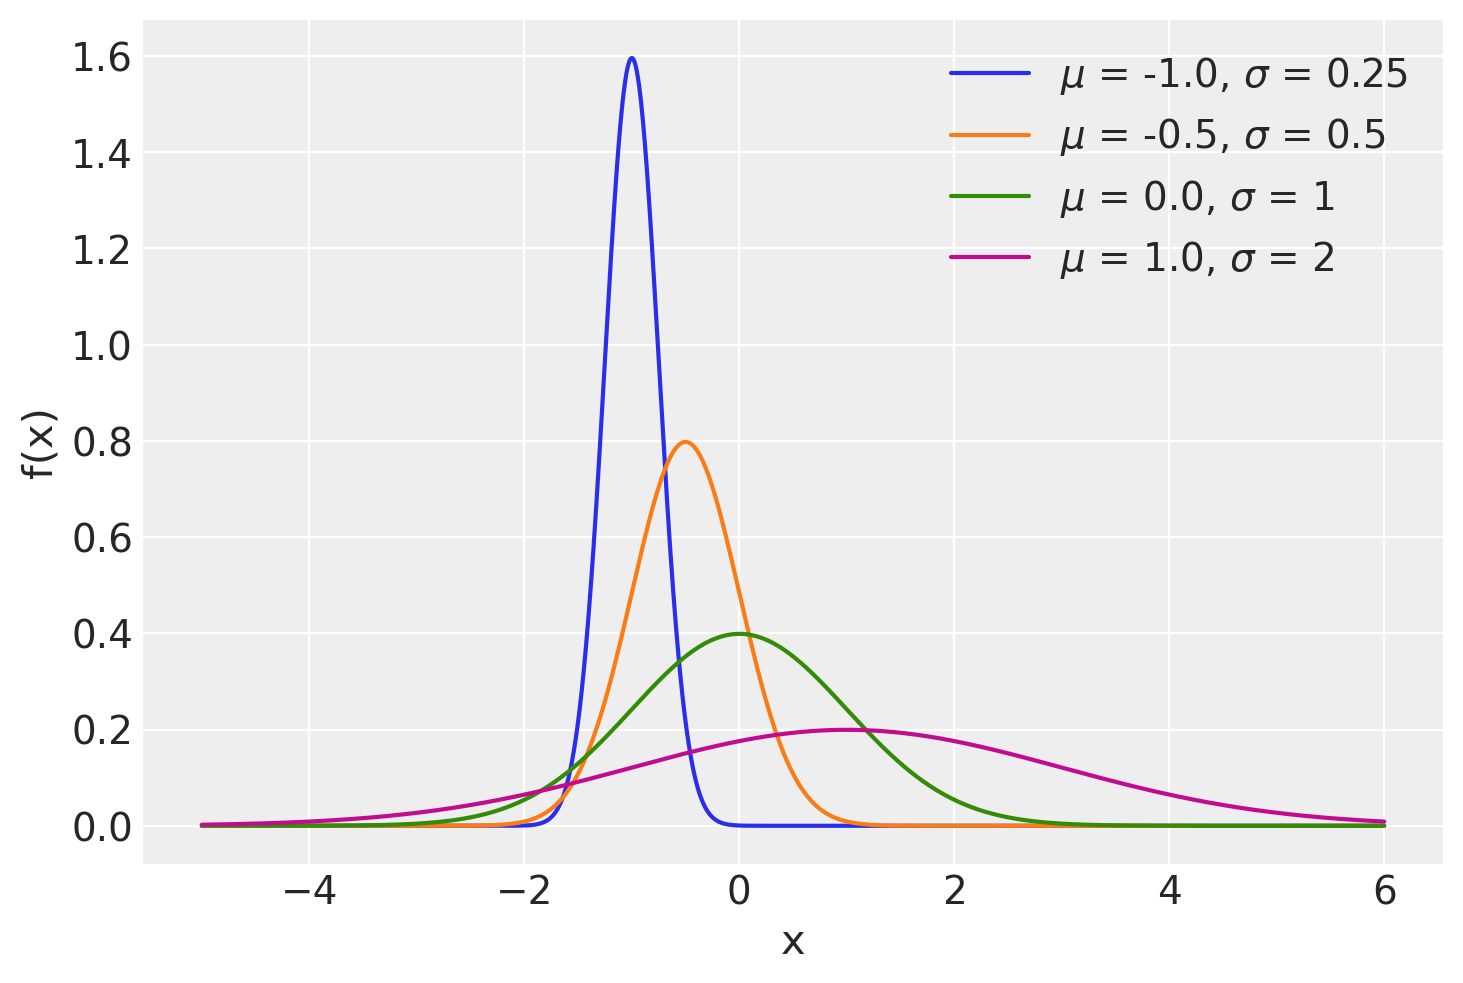

In [37]:
x = np.arange(-5, 6, 0.001)

mus = [-1.0, -0.5, 0.0, 1.0]
sigmas = [0.25, 0.5, 1, 2]

plt.figure()

for mu, sigma in zip(mus, sigmas):
    pdf = stats.norm.pdf(x, mu, sigma)
    plt.plot(x, pdf, label=r"$\mu$ = {}, $\sigma$ = {}".format(mu, sigma))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend(loc=1);

### Concentrazione

È istruttivo osservare il grado di concentrazione della distribuzione Normale attorno alla media:

$$
\begin{align}
P(\mu - \sigma < Y < \mu + \sigma) &= P (-1 < Z < 1) \simeq 0.683, \notag\\
P(\mu - 2\sigma < Y < \mu + 2\sigma) &= P (-2 < Z < 2) \simeq 0.956, \notag\\
P(\mu - 3\sigma < Y < \mu + 3\sigma) &= P (-3 < Z < 3) \simeq 0.997. \notag
\end{align}
$$

Si noti come un dato la cui distanza dalla media è superiore a 3 volte la deviazione standard presenti un carattere di eccezionalità perché meno del 0.3% dei dati della distribuzione Normale presentano questa caratteristica.

Per indicare la distribuzione Normale si usa la notazione $\mathcal{N}(\mu, \sigma)$.

### Funzione di ripartizione

Il valore della funzione di ripartizione di $Y$ nel punto $y$ è l'area sottesa alla curva di densità $f(y)$ nella semiretta $(-\infty, y]$. Non esiste alcuna funzione elementare per la funzione di ripartizione

$$
F(y) = \int_{-\infty}^y {1 \over {\sigma\sqrt{2\pi} }} \exp \left\{-\frac{(y - \mu)^2}{2\sigma^2} \right\} dy, 
$$ (eq-gaussian-rip-formula)

pertanto le probabilità $P(Y < y)$ vengono calcolate mediante integrazione numerica approssimata. I valori della funzione di ripartizione di una variabile casuale Normale sono dunque forniti da un software.

Esaminiamo le funzioni per la densità Normale. Il metodo `rng.normal(loc, scale, size)` produce `size` valori casuali estratti dalla distribuzione Normale specificata. Per esempio, un singolo valore casuale dalla $\mathcal{N}(\mu = 100, \sigma = 15)$ è:

In [38]:
rng.normal(loc=100, scale=15, size=1)

array([77.8271813])

Estraiamo ora 10 valori a caso dalla $\mathcal{N}(100, 15)$:

In [40]:
qi = rng.normal(loc=100, scale=15, size=10)
print(qi)

[107.37134121  74.33288092  70.05953321 100.16099998  67.01041676
 102.19573565 114.68076458  58.88627549  69.38274746 112.14401099]


Per trovare la probabilità che un'osservazione estratta a caso dalla $\mathcal{N}(100, 15)$ abbia un valore minore o uguale a, diciamo, 115, troviamo il valore della funzione di ripartizione (o funzione cumulativa di densità) nel punto 115.

In [41]:
stats.norm.cdf(115, 100, 15)

0.8413447460685429

Questa è l'area sottesa alla funzione di densità nell'intervallo $[-\infty, 115]$, come indicato nella figura seguente.

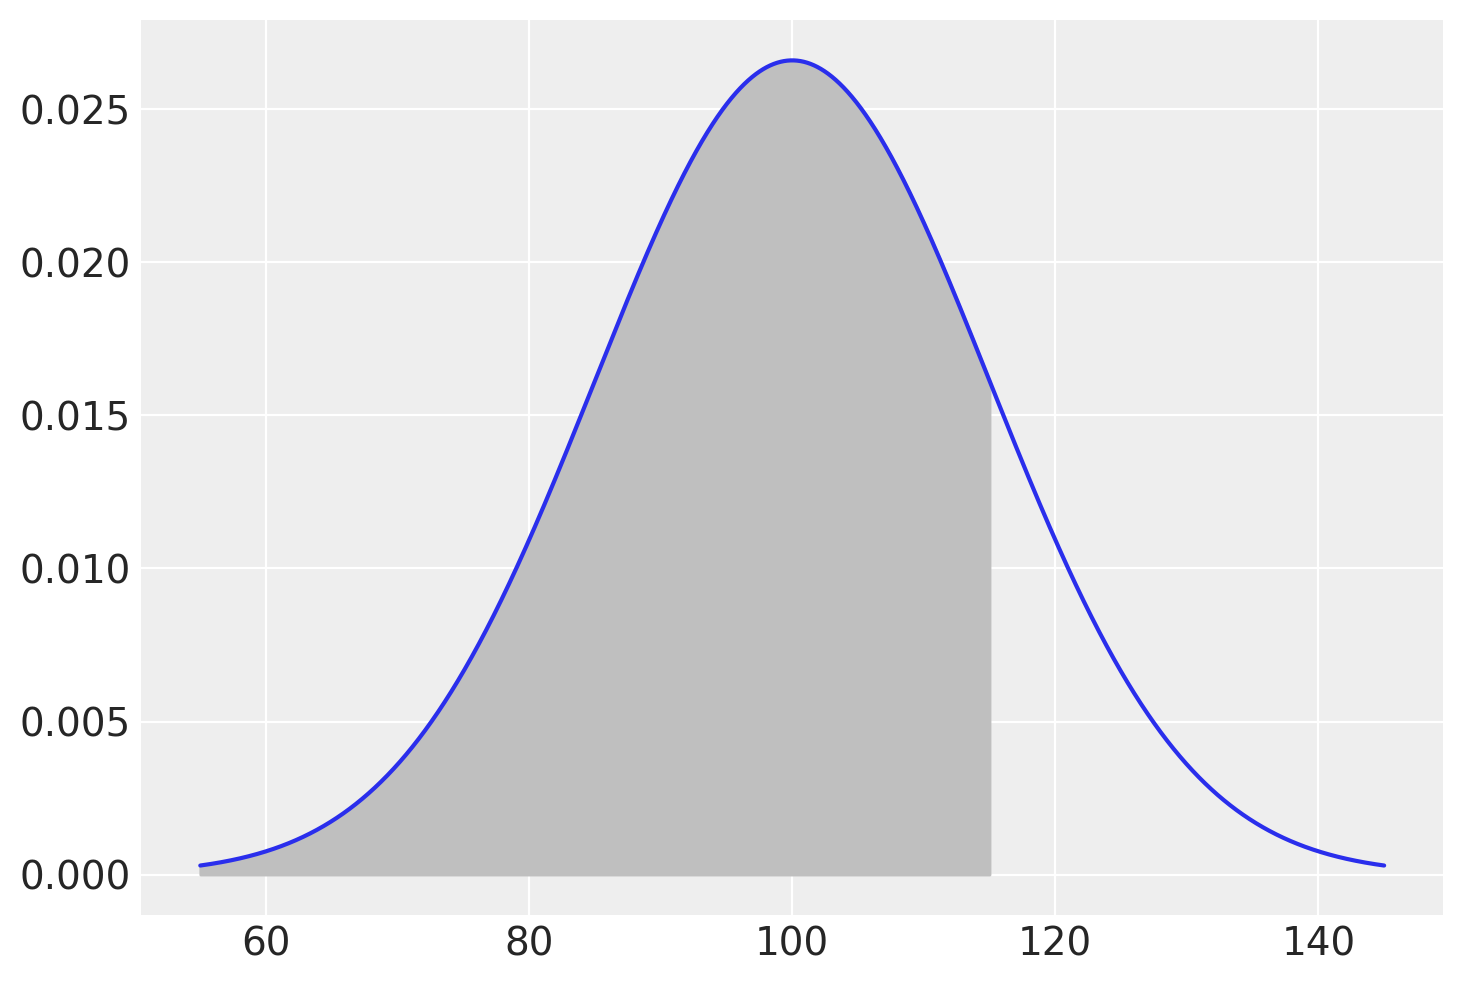

In [42]:
mu = 100
sigma = 15
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 10000)
fx = stats.norm.pdf(x, mu, sigma)

plt.figure()
plt.plot(x, fx)
_ = plt.fill_between(x, fx, where=x <= 115, color="0.75")

Solo per fare un esempio, qui di seguito fornisco il codice Python per calcolare l'integrale che stiamo discutendo per mezzo della funzione `quad` della libreria SciPy:

In [43]:
def gaussian(x, mu, sig):
    return (
        1.0 / (np.sqrt(2.0 * np.pi) * sig) * np.exp(-np.power((x - mu) / sig, 2.0) / 2)
    )

mu = 100
sigma = 15
result, error = quad(gaussian, -1000, 115, args=(mu, sigma))
print("Il risultato è", result, "con errore", error)

Il risultato è 0.8413447460685429 con errore 4.0191197364560644e-10


Il risultato replica quello prodotto da `.norm.cdf()`.

Per trovare la proporzione di persone nella popolazione che hanno un QI maggiore di 2 deviazioni standard dalla media consideriamo l'evento complementare:

In [44]:
1 - stats.norm.cdf(130, 100, 15)

0.02275013194817921

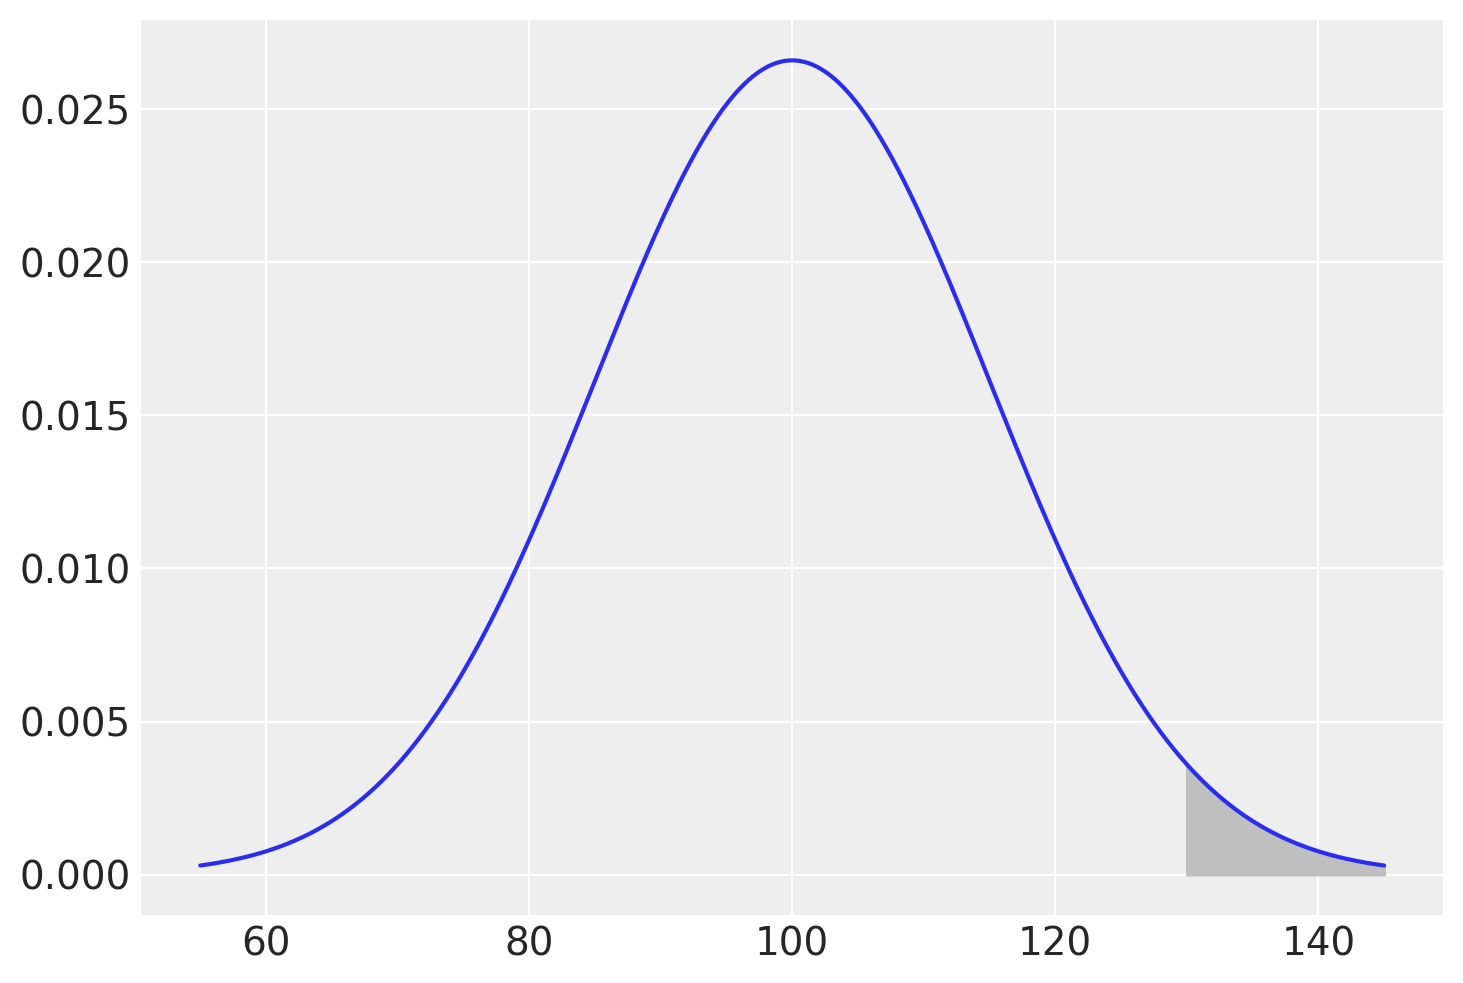

In [45]:
plt.figure()
plt.plot(x, fx)
plt.fill_between(x, fx, where=x >= 130, color="0.75");

In maniera equivalente, possiamo usare la *Survival Function*:

In [46]:
stats.norm.sf(130, 100, 15)

0.022750131948179198

La funzione `ppf` restituisce il quantile della Normale. Ad esempio:

In [47]:
stats.norm.ppf(1 - 0.022750131948179195, 100, 15)

130.0

### Distribuzione Normale standard

La distribuzione Normale di parametri $\mu = 0$ e $\sigma = 1$ viene detta *distribuzione Normale standard*. La famiglia Normale è l'insieme avente come elementi tutte le distribuzioni Normali con parametri $\mu$ e $\sigma$ diversi. Tutte le distribuzioni Normali si ottengono dalla Normale standard mediante una trasformazione lineare: se $Y \sim \mathcal{N}(\mu_Y, \sigma_Y)$ allora

$$
X = a + b Y \sim \mathcal{N}(\mu_X = a+b \mu_Y, \sigma_X = \left|b\right|\sigma_Y).
$$

L'area sottesa alla curva di densità di $\mathcal{N}(\mu, \sigma)$ nella semiretta $(-\infty, y]$ è uguale all'area sottesa alla densità Normale standard nella semiretta $(-\infty, z]$, in cui $z = (y -\mu_Y )/\sigma_Y$ è il punteggio standard di $Y$. Per la simmetria della distribuzione, l'area sottesa nella semiretta $[1, \infty)$ è uguale all'area sottesa nella semiretta $(-\infty, 1]$ e quest'ultima coincide con $F(-1)$. Analogamente, l'area sottesa nell'intervallo $[y_a, y_b]$, con $y_a < y_b$, è pari a $F(z_b) - F(z_a)$, dove $z_a$ e $z_b$ sono i punteggi standard di $y_a$ e $y_b$.

Si ha anche il problema inverso rispetto a quello del calcolo delle aree: dato un numero $0 \leq p \leq 1$, il problema è quello di determinare un numero $z \in \mathbb{R}$ tale che $P(Z < z) = p$. Il valore $z$ cercato è detto *quantile* di ordine $p$ della Normale standard e può essere trovato mediante un software.

Supponiamo che l'altezza degli individui adulti segua la distribuzione Normale di media $\mu = 1.7$ m e deviazione standard $\sigma = 0.1$ m. Vogliamo sapere la proporzione di individui adulti con un'altezza compresa tra $1.7$ e $1.8$ m.

Il problema ci chiede di trovare l'area sottesa alla distribuzione $\mathcal{N}(\mu = 1.7, \sigma = 0.1)$ nell'intervallo $[1.7, 1.8]$:

In [48]:
stats.norm.cdf(1.8, 1.7, 0.1) - stats.norm.cdf(1.7, 1.7, 0.1)

0.34134474606854315

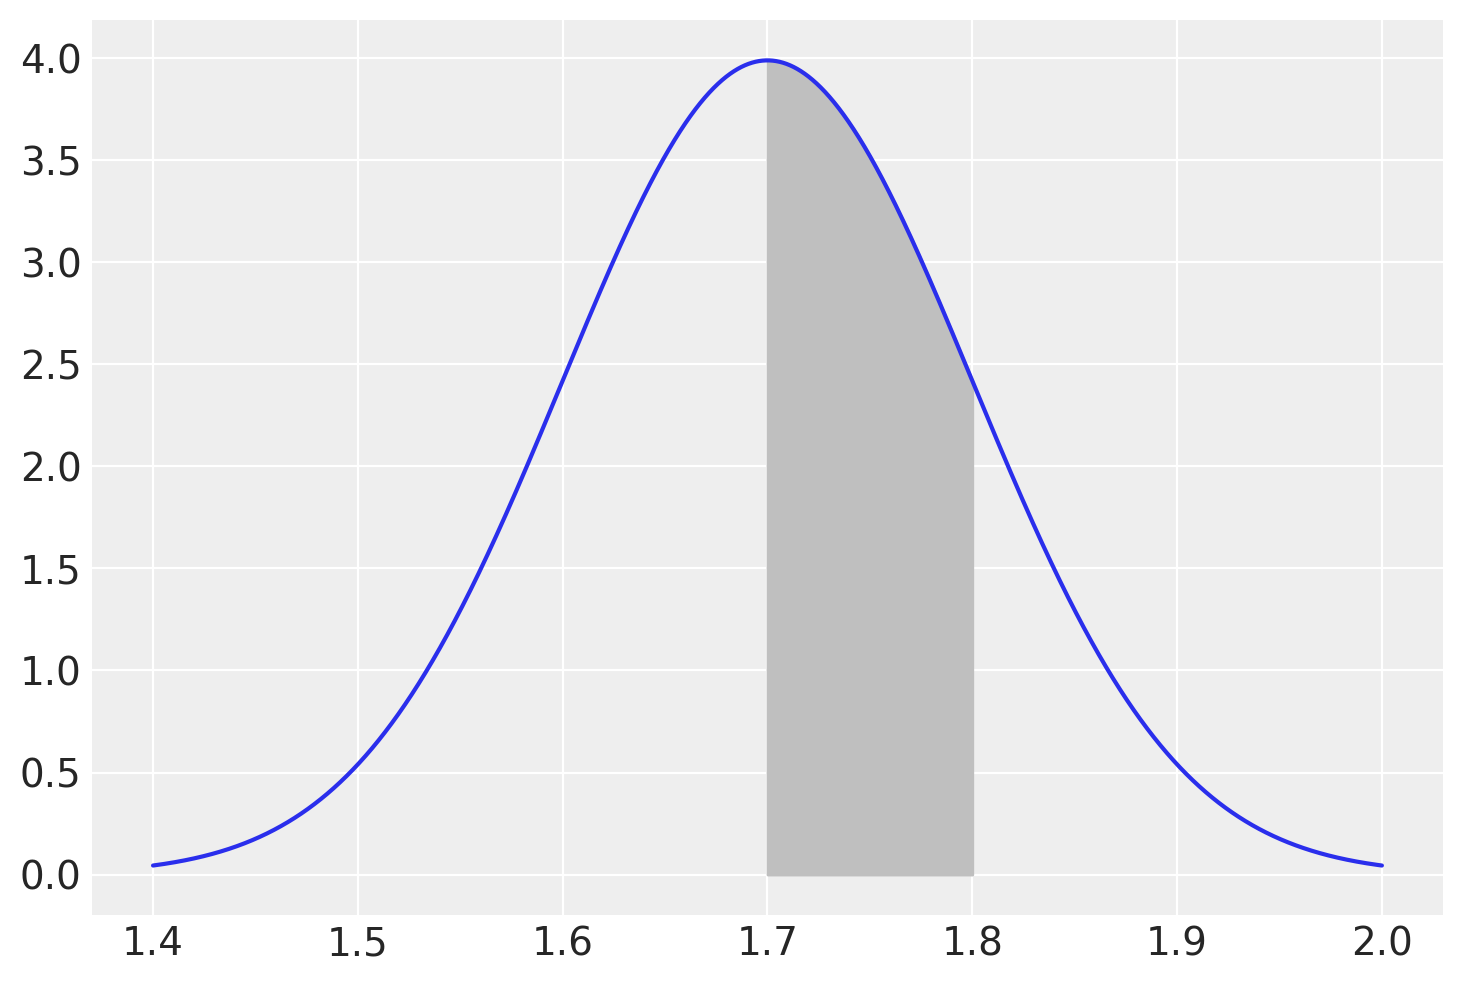

In [49]:
mu = 1.7
sigma = 0.1
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 10000)
fx = stats.norm.pdf(x, mu, sigma)
plt.figure()
plt.plot(x, fx)
plt.fill_between(x, fx, where=(x >= 1.7) & (x <= 1.8), color="0.75");

In maniera equivalente, possiamo standardizzare i valori che delimitano l'intervallo considerato e utilizzare la funzione di ripartizione della normale standardizzata. I limiti inferiore e superiore dell'intervallo sono

$$
z_{\text{inf}} = \frac{1.7 - 1.7}{0.1} = 0, \quad z_{\text{sup}} = \frac{1.8 - 1.7}{0.1} = 1.0,
$$

quindi otteniamo

In [51]:
stats.norm.cdf(1.0, 0, 1) - stats.norm.cdf(0, 0, 1)

0.3413447460685429

Il modo più semplice per risolvere questo problema resta comunque quello di rendersi conto che la probabilità richiesta non è altro che la metà dell'area sottesa dalle distribuzioni Normali nell'intervallo $[\mu - \sigma, \mu + \sigma]$, ovvero $0.683/2$.

Consideriamo ora la visualizzazione della PDF, la CDF e l'inverso della CDF della distribuzione normale.

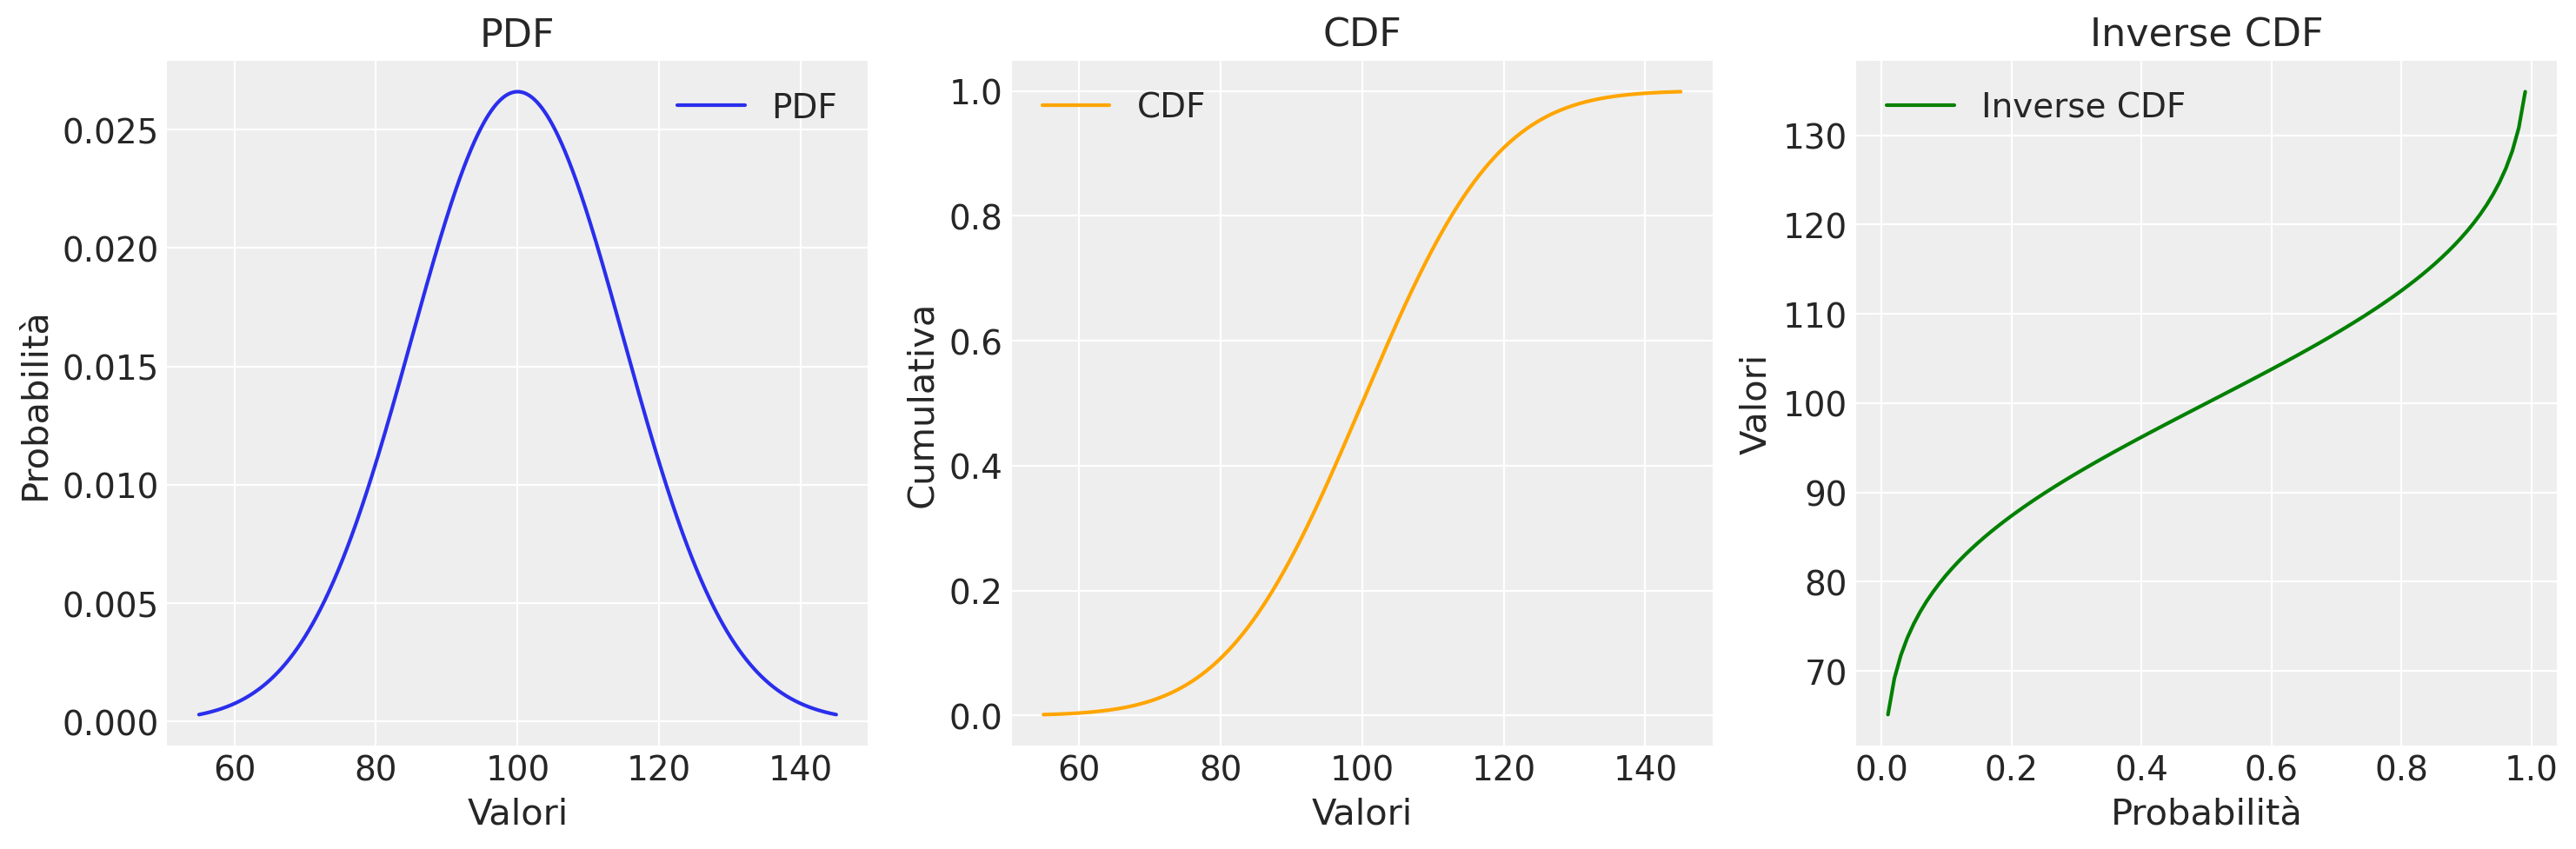

In [52]:
# Definisco i parametri della distribuzione
mu = 100
sigma = 15

# Creo un range di valori su cui calcolare le funzioni
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)

# Calcolo la PDF, CDF, e l'inverso della CDF
pdf = stats.norm.pdf(x, mu, sigma)
cdf = stats.norm.cdf(x, mu, sigma)
ppf = stats.norm.ppf(np.linspace(0.01, 0.99, 100), mu, sigma)  # Evitiamo 0 e 1 per l'inverso

# Creo i grafici in una sola riga
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Grafico della PDF
axs[0].plot(x, pdf, label='PDF')
axs[0].set_title('PDF')
axs[0].set_xlabel('Valori')
axs[0].set_ylabel('Probabilità')
axs[0].legend()

# Grafico della CDF
axs[1].plot(x, cdf, label='CDF', color='orange')
axs[1].set_title('CDF')
axs[1].set_xlabel('Valori')
axs[1].set_ylabel('Cumulativa')
axs[1].legend()

# Grafico dell'inverso della CDF
axs[2].plot(np.linspace(0.01, 0.99, 100), ppf, label='Inverse CDF', color='green')
axs[2].set_title('Inverse CDF')
axs[2].set_xlabel('Probabilità')
axs[2].set_ylabel('Valori')
axs[2].legend()

plt.tight_layout()
plt.show()

Dovrebbe essere chiaro dalla figura che queste sono tre diverse modalità di osservare la stessa informazione.

## Distribuzione Chi-quadrato

Dalla Normale deriva la distribuzione $\chi^2$. La distribuzione $\chi^2_{~k}$ con $k$ gradi di libertà descrive la variabile casuale

$$
Z_1^2 + Z_2^2 + \dots + Z_k^2,
$$

dove $Z_1, Z_2, \dots, Z_k$ sono variabili casuali i.i.d. che seguono la distribuzione Normale standard $\mathcal{N}(0, 1)$. La variabile casuale chi-quadrato dipende dal parametro intero positivo $\nu = k$ che ne identifica il numero di gradi di libertà. La densità di probabilità di $\chi^2_{~\nu}$ è

$$
f(x) = C_{\nu} x^{\nu/2-1} \exp (-x/2), \qquad \text{se } x > 0,
$$

dove $C_{\nu}$ è una costante positiva.

La figura seguente mostra alcune distribuzioni Chi-quadrato variando il parametro $\nu$.

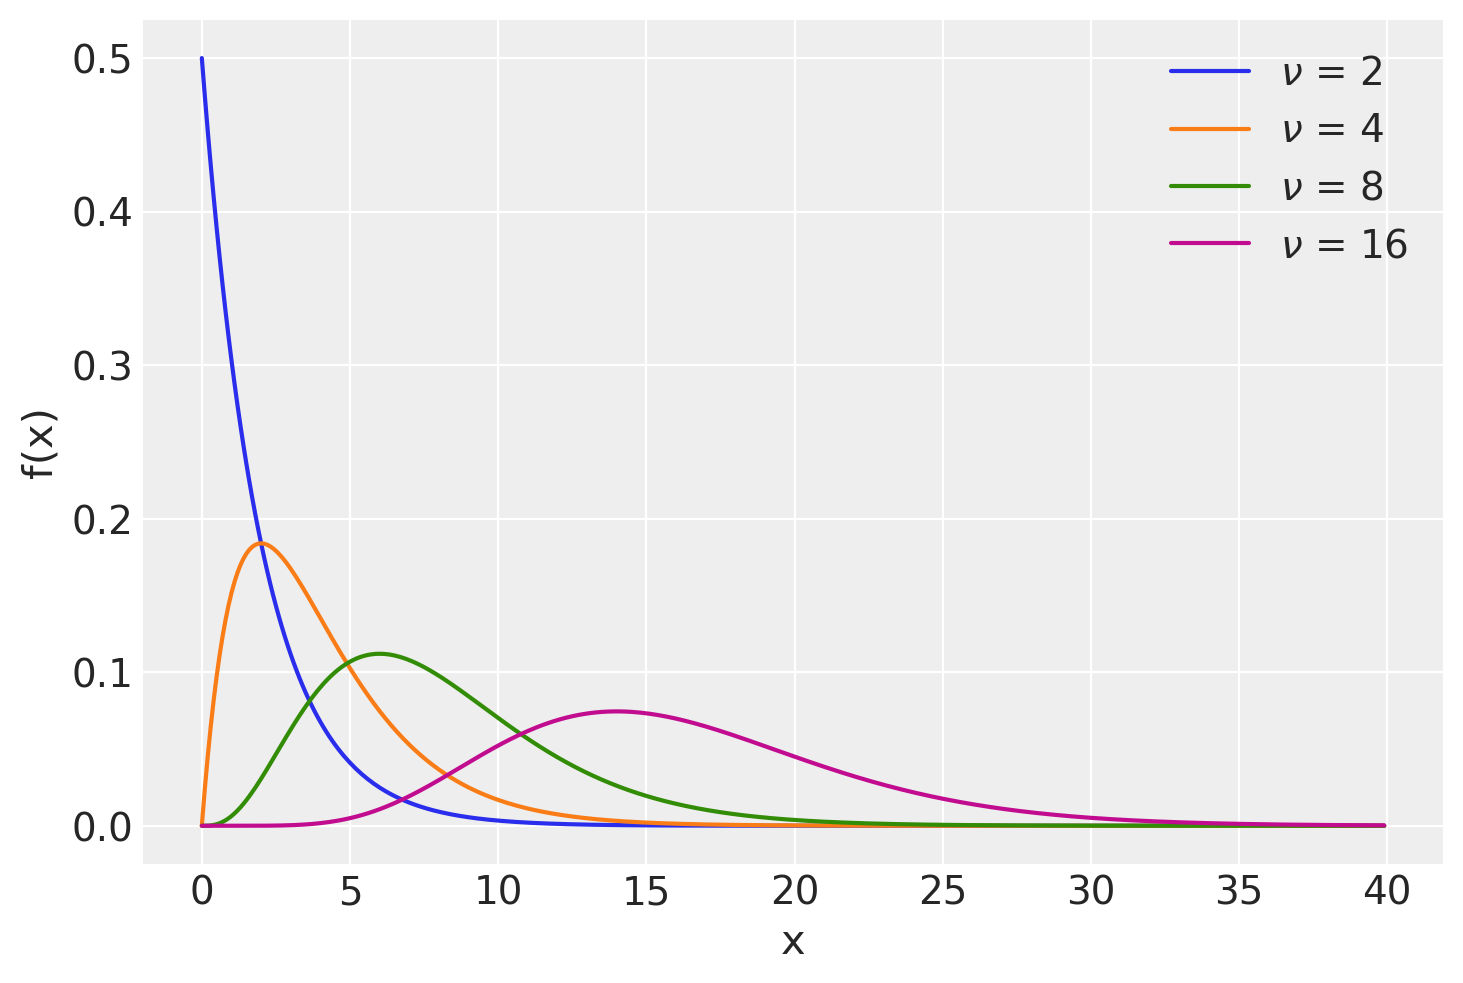

In [53]:
x = np.arange(0, 40, 0.1)

nus = [2, 4, 8, 16]
plt.figure()
for nu in nus:
    pdf = stats.chi2.pdf(x, nu)
    plt.plot(x, pdf, label=r"$\nu$ = {}".format(nu))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend(loc=1);

### Proprietà

-   La distribuzione di densità $\chi^2_{~\nu}$ è asimmetrica.
-   Il valore atteso di una variabile $\chi^2_{~\nu}$ è uguale a $\nu$.
-   La varianza di una variabile $\chi^2_{~\nu}$ è uguale a $2\nu$.
-   Per $k \rightarrow \infty$, la $\chi^2_{~\nu} \rightarrow \mathcal{N}$.
-   Se $X$ e $Y$ sono due variabili casuali chi-quadrato indipendenti con $\nu_1$ e $\nu_2$ gradi di libertà, ne segue che $X + Y \sim \chi^2_m$, con $m = \nu_1 + \nu_2$. Tale principio si estende a qualunque numero finito di variabili casuali chi-quadrato indipendenti.


Per fare un esempio, consideriamo la v.c. $\chi^2_5$.

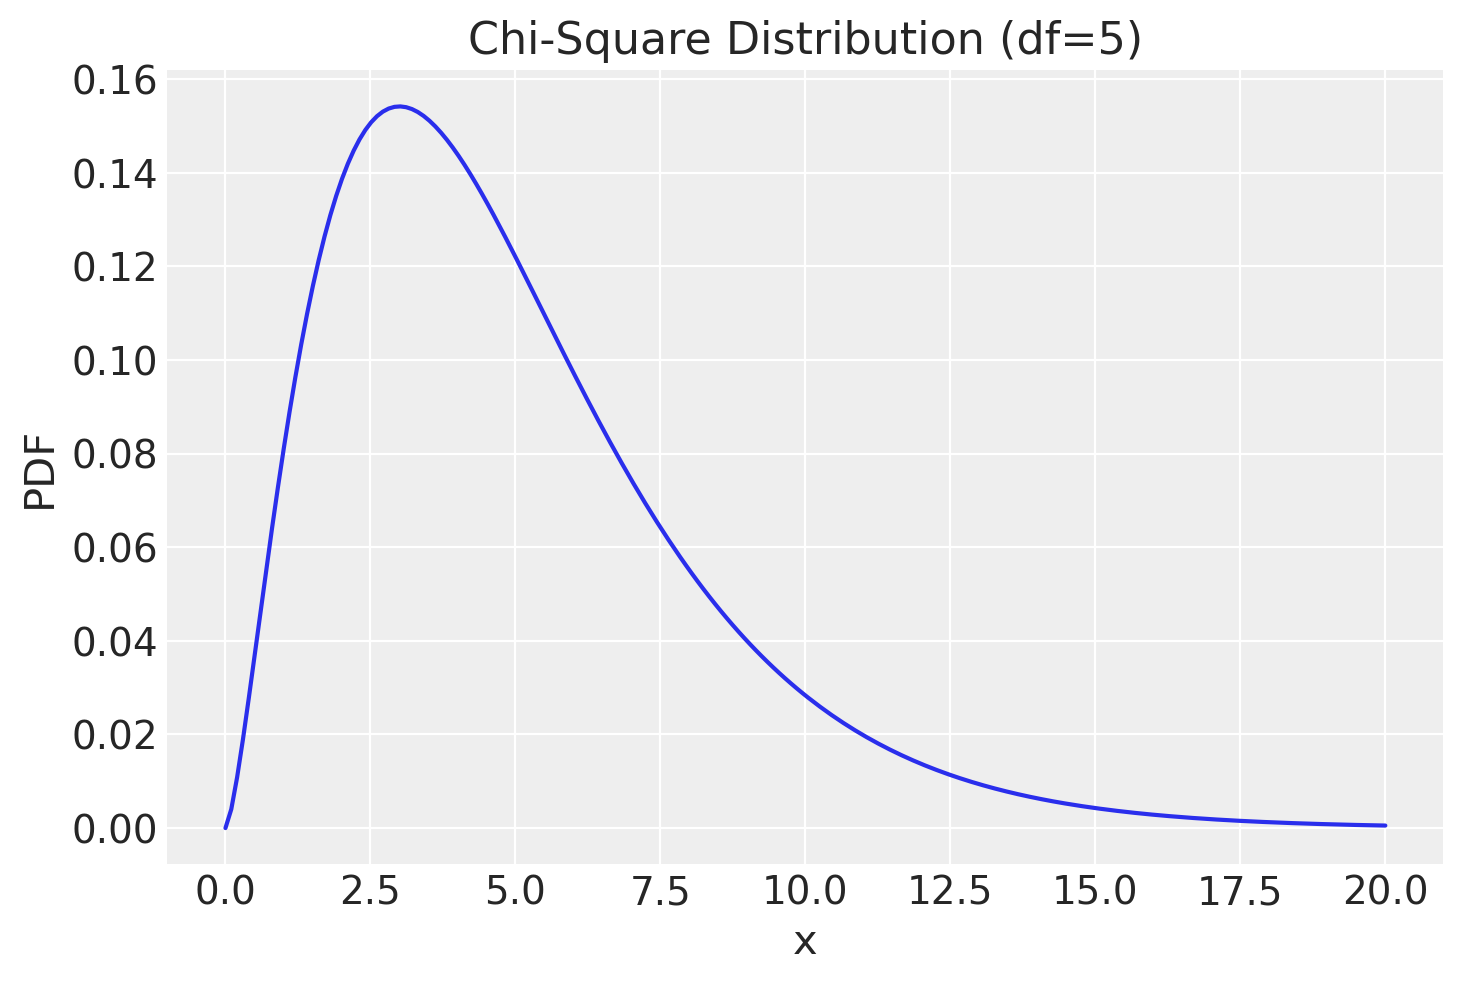

In [54]:
# Set the degrees of freedom
df = 5

# Create a chi-square distribution object
chi2_dist = stats.chi2(df)

# Generate x values for the plot
x = np.linspace(0, 20, 200)

# Calculate the probability density function (PDF) of the chi-square distribution for x values
pdf = chi2_dist.pdf(x)

# Plot the PDF
plt.figure()
plt.plot(x, pdf)
plt.title('Chi-Square Distribution (df=5)')
plt.xlabel('x')
plt.ylabel('PDF');

Generiamo 1000000 valori da questa distribuzione.

In [55]:
x = rng.chisquare(5, 1000000)
x[0:20]

array([3.66284512, 2.96353593, 4.93609572, 4.67151242, 4.10927523,
       4.16530706, 3.36823832, 9.92342755, 7.02541475, 3.23262943,
       2.73771833, 3.01973299, 4.83304038, 3.16952063, 5.98040985,
       6.26951139, 8.73351727, 7.28411818, 7.75225854, 5.77346535])

Calcoliamo la media di questi valori.

In [56]:
np.mean(x)

5.0050584059950385

Calcolo la varianza.

In [57]:
np.var(x, ddof=0)

10.013703149640937

## Distribuzione $t$ di Student

Dalle distribuzioni Normale e Chi-quadrato deriva un'altra distribuzione molto nota, la $t$ di Student. Se $Z \sim \mathcal{N}$ e $W \sim \chi^2_{~\nu}$ sono due variabili casuali indipendenti, allora il rapporto

$$
T = \frac{Z}{\Big( \frac{W}{\nu}\Big)^{\frac{1}{2}}}
$$ {#eq-student-t-distr}

definisce la distribuzione $t$ di Student con $\nu$ gradi di libertà. Si usa scrivere $T \sim t_{\nu}$. L'andamento della distribuzione $t$ di Student è simile a quello della distribuzione Normale, ma ha una dispersione maggiore (ha le code più pesanti di una Normale, ovvero ha una varianza maggiore di 1).

La seguente mostra alcune distribuzioni $t$ di Student variando il parametro $\nu$.

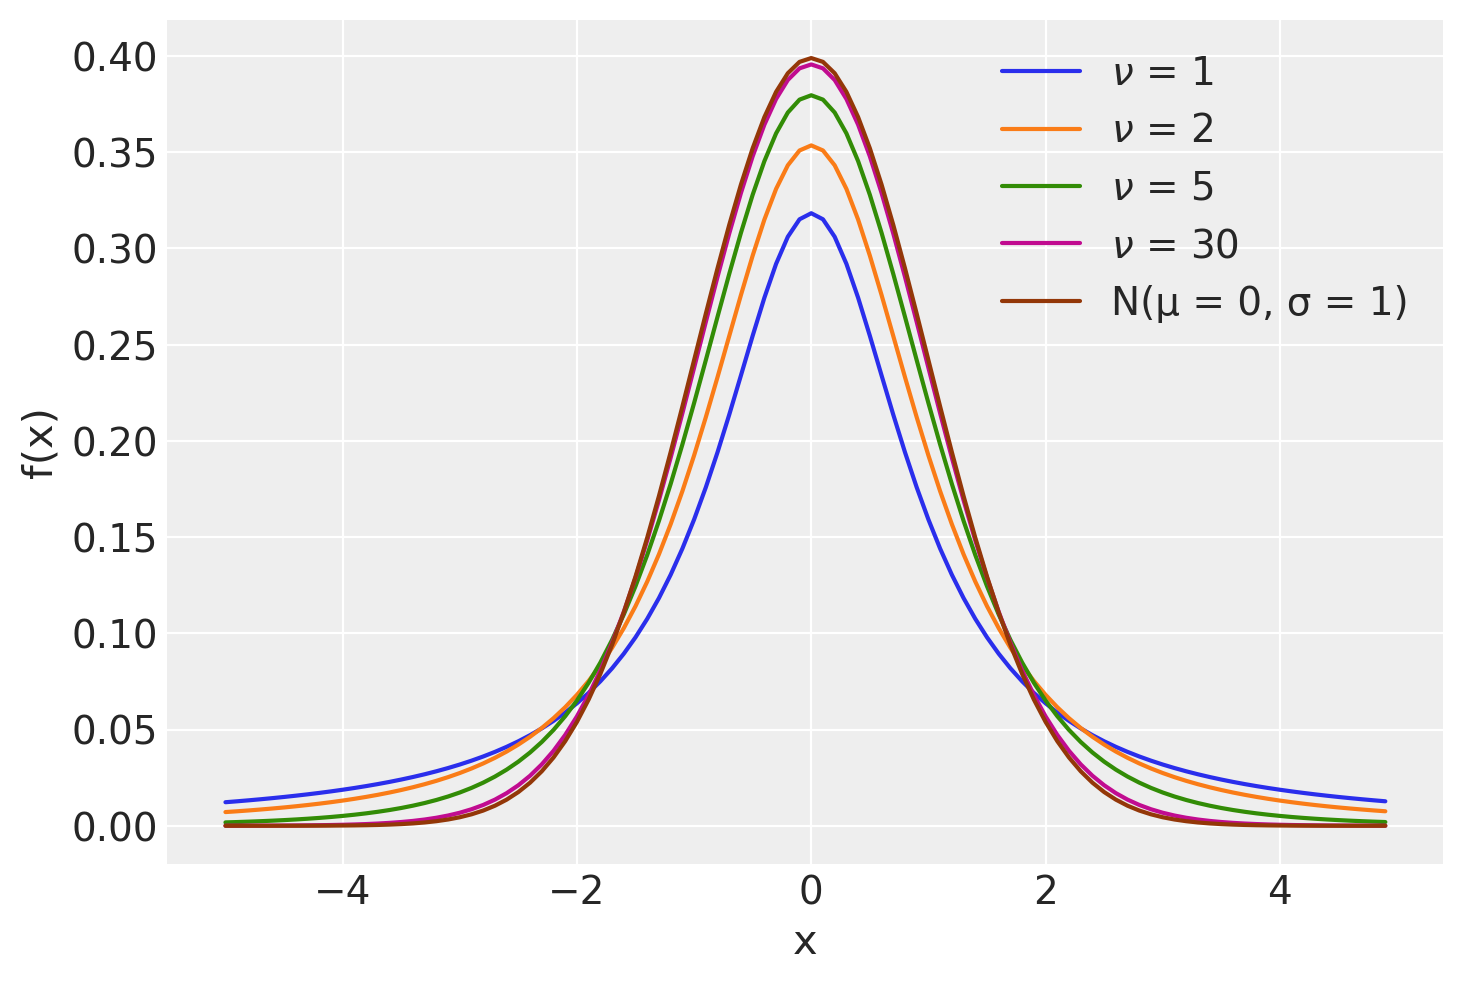

In [58]:
x = np.arange(-5, 5, 0.1)

nus = [1, 2, 5, 30]

plt.figure()
for nu in nus:
    pdf = stats.t.pdf(x, nu)
    plt.plot(x, pdf, label=r"$\nu$ = {}".format(nu))
plt.plot(x, stats.norm.pdf(x, 0, 1), label="N(μ = 0, σ = 1)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend(loc=1);

### Proprietà

La variabile casuale $t$ di Student soddisfa le seguenti proprietà:

1.  Per $\nu \rightarrow \infty$, $t_{\nu}$ tende alla normale standard $\mathcal{N}(0, 1)$.
2.  La densità della $t_{\nu}$ è una funzione simmetrica con valore atteso nullo.
3.  Per $\nu > 2$, la varianza della $t_{\nu}$ vale $\nu/(\nu - 2)$; pertanto è sempre maggiore di 1 e tende a 1 per $\nu \rightarrow \infty$.


Per esempio, calcoliamo il valore della funzione di ripartizione di ordine 0.025 nel caso di una $t_{30}$.

In [59]:
stats.t.ppf(0.025, 30)

-2.042272456301238

Aumentiamo i gradi di libertà: $\nu$ = 1000.

In [60]:
stats.t.ppf(0.025, 1000)

-1.9623390808264078

Questo valore è quasi identico a quello della Normale stanardizzata.

In [61]:
stats.norm.ppf(0.025, 0, 1)

-1.9599639845400545

La ragione per cui il quantile della distribuzione $t$ con $\nu=30$ è maggiore (in valore assoluto) del quantile omotetico della distribuzione Normale Standard è che la distribuzione $t$ ha una varianza maggiore rispetto alla distribuzione Normale Standard.

## Funzione Beta di Eulero

La funzione Beta di Eulero è una funzione matematica, *non* una densità di probabilità. La menzioniamo qui perché viene utilizzata nella densità di probabilità Beta. La funzione Beta di Eulero, comunemente indicata con il simbolo $B(\alpha, \beta)$, si può scrivere in molti modi diversi; per i nostri scopi la presentiamo così:

$$
B(\alpha, \beta) = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha + \beta)}\,,
$$ {#eq-eulero-function}

dove $\Gamma(x)$ è la funzione Gamma, ovvero il fattoriale discendente, cioè

$$
(x-1)(x-2)\ldots (x-n+1)\notag\,.
$$

Per esempio, posti $\alpha = 3$ e $\beta = 9$, la funzione Beta di Eulero assume il valore

In [3]:
alpha = 3
beta = 9
sc.beta(alpha, beta)

0.00202020202020202

Si noti che abbiamo usato la funzione `beta` della libreria `scipy.special`. Lo stesso risultato si ottiene svolgendo i calcoli in maniera esplicita:

In [5]:
((2) * (8 * 7 * 6 * 5 * 4 * 3 * 2)) / (11 * 10 * 9 * 8 * 7 * 6 * 5 * 4 * 3 * 2)

0.00202020202020202

In [6]:
(math.factorial(alpha-1)*math.factorial(beta-1)) / math.factorial(alpha+beta-1)

0.00202020202020202

oppure usando la funzione `gamma` di `scipy.special`:

In [7]:
sc.gamma(alpha) * sc.gamma(beta) / sc.gamma(alpha + beta)


0.00202020202020202

## Distribuzione Beta

La distribuzione di probabilità Beta, denotata comunemente come $Beta(\alpha, \beta)$, è utilizzata per modellare fenomeni che sono espressi in percentuali o proporzioni. Un aspetto cruciale di questa distribuzione è la sua definizione esclusiva nell'intervallo $(0, 1)$. In pratica, ciò significa che essa considera valori compresi strettamente tra 0 e 1, escludendo sia lo 0 che l'1 come estremi.

### Definizione Formale

Consideriamo una variabile casuale $\theta$, la quale può assumere qualunque valore nell'intervallo aperto $(0, 1)$. Se diciamo che $\theta$ segue una distribuzione Beta con parametri $\alpha$ e $\beta$ (indicato come $\theta \sim \text{Beta}(\alpha, \beta)$), intendiamo che la sua funzione di densità è descritta dalla seguente formula:

$$
\text{Beta}(\theta \mid \alpha, \beta) = \frac{1}{B(\alpha, \beta)}\theta^{\alpha-1} (1-\theta)^{\beta-1} =  \frac{\Gamma(\alpha+ \beta)}{\Gamma(\alpha)\Gamma(\beta)}\theta^{\alpha-1} (1-\theta)^{\beta-1} \quad \text{per } \theta \in (0, 1)\,,
$$

dove $B(\alpha, \beta)$ è la funzione beta di Eulero, definita come $\frac{\Gamma(\alpha) \Gamma(\beta)}{\Gamma(\alpha + \beta)}$.

### I Parametri $\alpha$ e $\beta$

I parametri $\alpha$ e $\beta$ giocano un ruolo cruciale nella distribuzione Beta, influenzando direttamente la sua forma e il suo comportamento. È essenziale che entrambi questi parametri siano positivi.

### Intuizione e Collegamento con la Distribuzione Binomiale

La distribuzione Beta può essere meglio compresa quando la si osserva in relazione con la distribuzione binomiale. Mentre la distribuzione binomiale modella il numero di successi in una serie di prove, la distribuzione Beta si focalizza sulla probabilità di successo in queste prove.

Nel contesto della distribuzione binomiale, la probabilità di successo è un parametro fisso; nella distribuzione Beta, questa probabilità diventa una variabile aleatoria.

### Interpretazione dei Parametri $\alpha$ e $\beta$

I parametri $\alpha$ e $\beta$ possono essere interpretati come rappresentanti il numero di successi e insuccessi, rispettivamente. Questa interpretazione è analoga ai termini $n$ e $n-x$ nella distribuzione binomiale.

La scelta di $\alpha$ e $\beta$ dipende dall'aspettativa iniziale della probabilità di successo: 
- Se si presume un'alta probabilità di successo (ad esempio, 90%), si potrebbe scegliere $\alpha = 90$ e $\beta = 10$.
- Al contrario, per una bassa aspettativa di successo, si potrebbe impostare $\alpha = 10$ e $\beta = 90$.

Un aumento di $\alpha$ (successi) sposta la distribuzione verso destra, mentre un aumento di $\beta$ (insuccessi) la sposta verso sinistra. Inoltre, se sia $\alpha$ sia $\beta$ aumentano, la distribuzione diventa più stretta, indicando una maggiore certezza.

Questa interpretazione consente di utilizzare la distribuzione Beta per esprimere le nostre credenze a priori riguardo a una sequenza di prove di Bernoulli, dove il rapporto tra successi e tentativi totali è dato da:

$$
\frac{\text{Numero di successi}}{\text{Numero di successi} + \text{Numero di insuccessi}} = \frac{\alpha}{\alpha + \beta}\notag\,.
$$

Al variare di $\alpha$ e $\beta$ si ottengono molte distribuzioni di forma diversa; un'illustrazione è fornita dalla seguente [GIF animata](https://en.wikipedia.org/wiki/File:PDF_of_the_Beta_distribution.gif).

La figura seguente mostra la distribuzione $Beta(x \mid \alpha, \beta)$ per $\alpha$ = 0.5, 5.0, 1.0, 2.0, 2.0 e $\beta$ = 5, 1.0, 3.0, 2.0, 5.0.

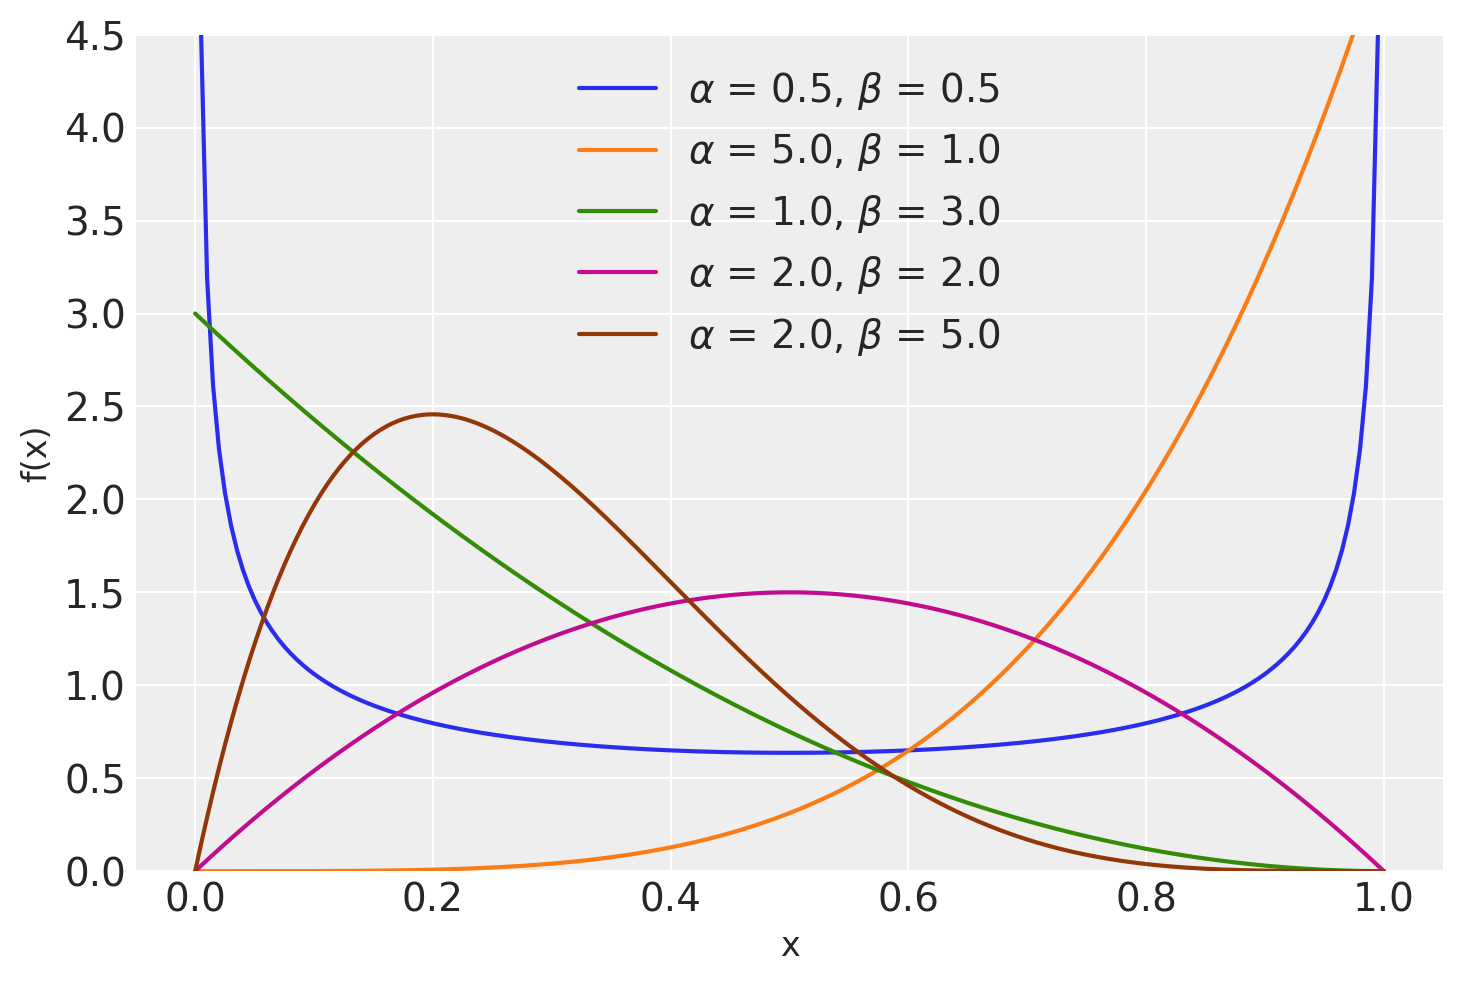

In [71]:
x = np.linspace(0, 1, 200)
alphas = [0.5, 5.0, 1.0, 2.0, 2.0]
betas = [0.5, 1.0, 3.0, 2.0, 5.0]

plt.figure()
for a, b in zip(alphas, betas):
    pdf = stats.beta.pdf(x, a, b)
    plt.plot(x, pdf, label=r"$\alpha$ = {}, $\beta$ = {}".format(a, b))
plt.xlabel("x", fontsize=12)
plt.ylabel("f(x)", fontsize=12)
plt.ylim(0, 4.5)
plt.legend(loc=9);

### Costante di normalizzazione

La relazione $\frac{1}{B(\alpha, \beta)} = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)}$ definisce il reciproco della funzione Beta di Eulero, $B(\alpha, \beta)$, come una costante di normalizzazione. Qui, $\Gamma(\cdot)$ denota la funzione Gamma di Eulero. Questa costante di normalizzazione garantisce che

$$
\int_0^1 \theta^{\alpha-1} (1-\theta)^{\beta-1} d\theta = 1\,,
$$

per $\alpha, \beta > 0$. Questa integrazione conferma che $\theta^{\alpha-1} (1-\theta)^{\beta-1}$, quando moltiplicata per la costante di normalizzazione, forma una densità di probabilità che si estende sull'intervallo $[0,1]$, con l'area sottesa dalla curva (l'integrale) uguale a 1. 

Ad esempio, con $\alpha = 3$ e $\beta = 9$ abbiamo

In [8]:
def integrand(p, a, b):
    return p ** (a - 1) * (1 - p) ** (b - 1)

a = 3
b = 9
result, error = quad(integrand, 0, 1, args=(a, b))
print(result)

0.00202020202020202


ovvero

In [9]:
result = (math.gamma(a) * math.gamma(b)) / math.gamma(a + b)
print(result)

0.00202020202020202


ovvero, usando la funzione beta di Eulero di `scipy.special`

In [10]:
sc.beta(a, b)

0.00202020202020202

### Proprietà

Il valore atteso, la moda e la varianza di una densità di probabilità Beta sono dati dalle seguenti equazioni:

$$
\mathbb{E}(\theta) = \frac{\alpha}{\alpha+\beta}\,,
$$ (eq-beta-mean)

$$
Mo(\theta) = \frac{\alpha-1}{\alpha+\beta-2}\,,
$$ (eq-beta-mode)

$$
\mathbb{V}(\theta) = \frac{\alpha \beta}{(\alpha+\beta)^2 (\alpha+\beta+1)}\,.
$$ (eq-beta-var)

Usando le formule precedenti, possiamo definire la funzione  `beta_mean_mode_variance()` in Python per calcolare la media, la moda e la varianza di una distribuzione di probabilità Beta:

In [11]:
def beta_mean_mode_variance(alpha, beta):
    mean = alpha / (alpha + beta)
    mode = (alpha - 1) / (alpha + beta - 2)
    variance = alpha * beta / ((alpha + beta) ** 2 * (alpha + beta + 1))
    return mean, mode, variance

Per esempio

In [15]:
alpha = 7
beta = 3
mean, mode, variance = beta_mean_mode_variance(alpha, beta)
print(f"Mean: {mean}, Mode: {mode}, Variance: {variance}")

Mean: 0.7, Mode: 0.75, Variance: 0.019090909090909092


### Distribuzione a priori coniugata

La distribuzione Beta rappresenta una prior coniugata ottimale per una gamma di distribuzioni legate a eventi di successo e fallimento, quali le distribuzioni Bernoulli, Binomiale, Binomiale Negativa e Geometrica, nell'ambito dell'inferenza Bayesiana. Questa caratteristica di prior coniugata rende il calcolo della distribuzione a posteriori particolarmente efficiente, poiché permette di bypassare onerose computazioni numeriche tipicamente associate all'inferenza Bayesiana.

Prendiamo, ad esempio, il caso in cui la distribuzione Beta, espressa come Beta(α, β), venga adottata come prior nel contesto di una distribuzione Binomiale. Questa scelta metodologica ci assicura che la distribuzione a posteriori manterrà la forma funzionale della distribuzione Beta. Ciò significa che, una volta raccolti i dati, l'aggiornamento a posteriori può essere eseguito semplicemente aggiungendo il numero di successi osservati (x) e il numero di fallimenti (n-x) ai parametri α e β del prior, rispettivamente. In tal modo, si ottiene una distribuzione a posteriori Beta con parametri aggiornati (α+x, β+n-x), senza la necessità di compiere la moltiplicazione tra la funzione di verosimiglianza e il prior.

::: {.callout-warning}
È importante prestare attenzione all'uso del termine "Beta" in questo contesto, poiché assume significati differenti a seconda del riferimento:
- La distribuzione Beta, che descrive una distribuzione di probabilità continua.
- La funzione Beta, una funzione matematica speciale.
- Il parametro β, che insieme ad α, definisce i parametri specifici della distribuzione Beta.
:::

## Distribuzione di Cauchy

La distribuzione di Cauchy è un caso speciale della distribuzione di $t$ di Student con 1 grado di libertà. È definita da una densità di probabilità che corrisponde alla seguente funzione, dipendente da due parametri $\alpha$ e $\beta$,

$$
f(x \mid \alpha, \beta) = \frac{1}{\pi \beta \left[1 + \left( \frac{x - \alpha}{\beta} \right)^2\right]}.
$$ {#eq-cauchy-formula}

Il grafico mostra alcune distribuzioni di Cauchy con $\alpha$ = 0., 0., 0., -2.0 e $\beta$ = .5, 1., 2., 1.0.

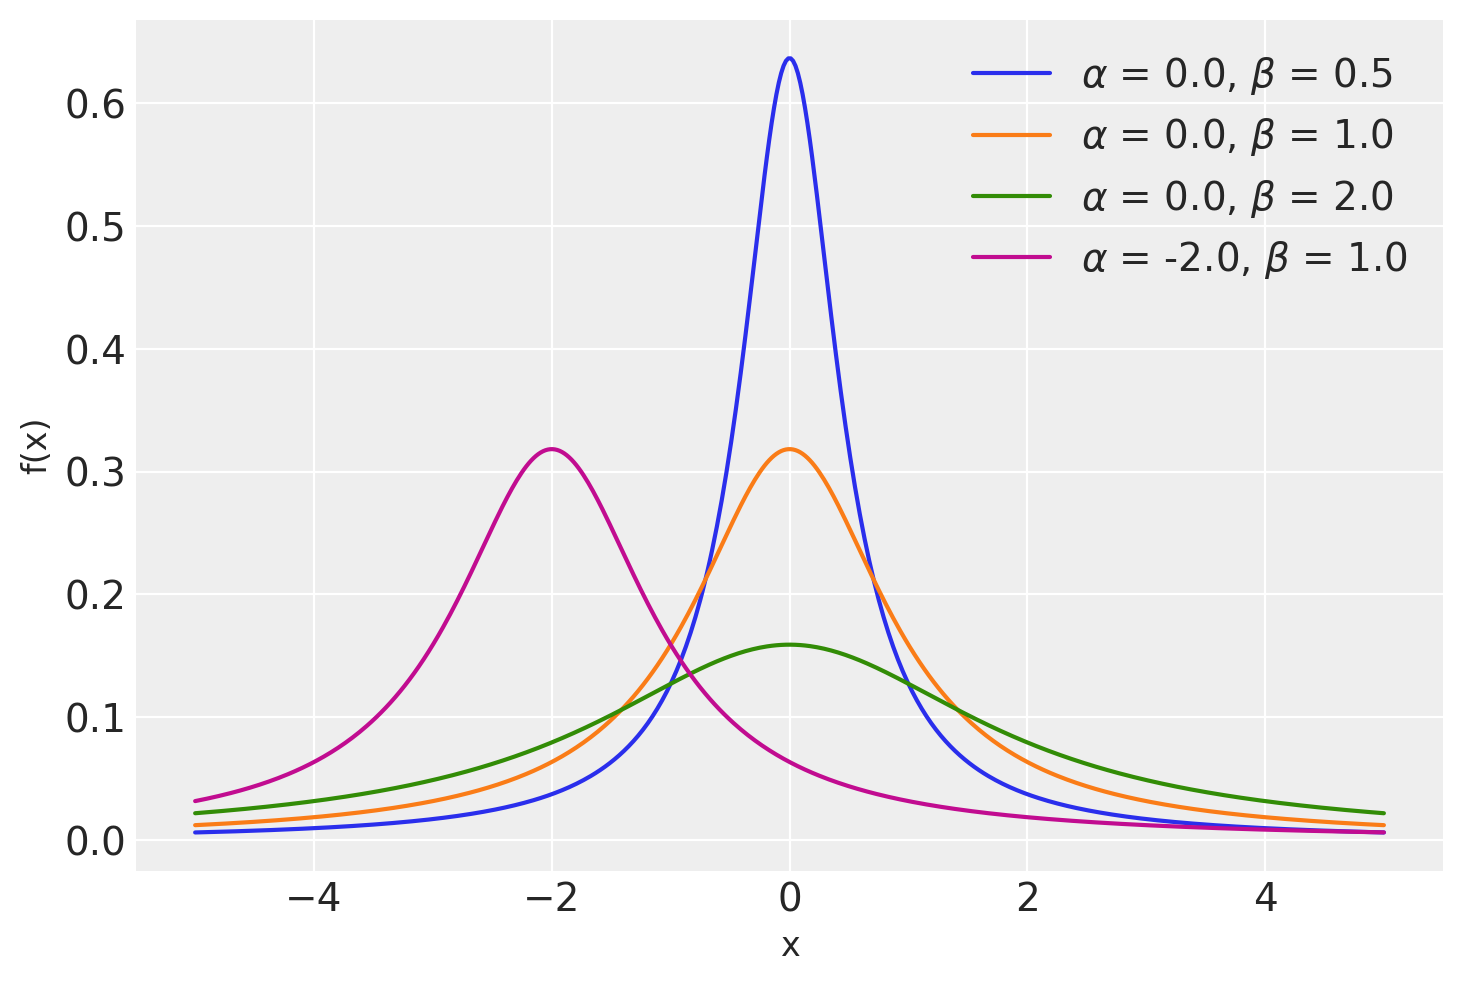

In [72]:
x = np.linspace(-5, 5, 500)
alphas = [0.0, 0.0, 0.0, -2.0]
betas = [0.5, 1.0, 2.0, 1.0]

plt.figure()
for a, b in zip(alphas, betas):
    pdf = stats.cauchy.pdf(x, loc=a, scale=b)
    plt.plot(x, pdf, label=r"$\alpha$ = {}, $\beta$ = {}".format(a, b))
plt.xlabel("x", fontsize=12)
plt.ylabel("f(x)", fontsize=12)
plt.legend(loc=1);

## Distribuzione Gamma

La distribuzione Gamma è ampiamente utilizzata nella statistica bayesiana come distribuzione a priori per parametri che sono strettamente positivi, come tassi o varianze. È particolarmente utile nella modellazione di variabili che rappresentano tempi di attesa o qualsiasi altra quantità che può assumere solo valori positivi. La densità di probabilità Gamma gioca un ruolo fondamentale nella modellazione del tempo di attesa per l'occorrenza di un certo numero di eventi indipendenti e rari, rendendola adatta per processi di Poisson generalizzati.

La distribuzione Gamma può essere vista come una generalizzazione della distribuzione esponenziale. Più precisamente, la distribuzione esponenziale è un caso speciale della distribuzione Gamma. Se sommiamo $n$ variabili casuali indipendenti, ciascuna delle quali segue una distribuzione esponenziale con parametro $\lambda$, il risultato segue una distribuzione Gamma con parametri $n$ (numero di variabili sommate) e $\lambda$ (tasso esponenziale). Questo si formalizza come:

$$
\text{Gamma}(n, \lambda) = \sum_{i=1}^n \text{Esponenziale}(\lambda).
$$

In particolare, la distribuzione Gamma con parametro di forma 1, ovvero $\text{Gamma}(1, \lambda)$, corrisponde esattamente a una distribuzione esponenziale con parametro $\lambda$, cioè:

$$
\text{Gamma}(1, \lambda) = \text{Esponenziale}(\lambda).
$$

La distribuzione Gamma è anche legata alla distribuzione normale in alcuni contesti. Sebbene non vi sia una relazione diretta e semplice tra una distribuzione Gamma e una normale, un caso specifico è quando il parametro di forma $n$ è molto grande (cioè $n \to \infty$). In questo caso, la distribuzione Gamma può essere approssimata da una distribuzione normale tramite il teorema del limite centrale. Più precisamente, quando $n$ è grande, una Gamma di parametri $n$ e $\lambda$ converge approssimativamente a una normale con media $n/\lambda$ e varianza $n/\lambda^2$.

## Parametrizzazione

La distribuzione Gamma è caratterizzata da due parametri principali: $\alpha$ e $\beta$, noti rispettivamente come parametro di forma e parametro di tasso (o, alternativamente, si può usare $\theta = \frac{1}{\beta}$, il parametro di scala).

### Parametro di forma ($\alpha$)

Il parametro di forma, $\alpha$, determina la forma generale della curva della distribuzione:

- Se $\alpha = 1$, la distribuzione Gamma si riduce a una distribuzione esponenziale, con la funzione di densità $f(x) = \beta e^{-\beta x}$.
- Se $\alpha > 1$, la distribuzione presenta un picco (modalità) attorno a $(\alpha - 1) \cdot \theta$, indicando una distribuzione più concentrata attorno a un valore medio.
- Se $\alpha < 1$, la distribuzione è inclinata verso destra, con una coda lunga che si estende verso valori più bassi, mostrando una maggiore probabilità di valori piccoli di $x$.

Il parametro $\alpha$ può essere interpretato come il numero di "eventi" che ci si aspetta si verifichino prima di raggiungere un certo tempo di attesa, in contesti di modelli di Poisson generalizzati. Ad esempio, se la distribuzione Gamma modella il tempo di attesa per l'arrivo di un certo numero di eventi, $\alpha$ indica il numero di eventi attesi.

Man mano che $\alpha$ aumenta, la distribuzione si sposta verso destra e diventa più simmetrica. Per valori alti di $\alpha$, la distribuzione Gamma si avvicina a una distribuzione normale.

### Parametro di scala ($\theta$) o tasso ($\beta$)

Il parametro $\theta$ (o, alternativamente, $\beta$) controlla la *scala temporale* o la *larghezza* della distribuzione:

- Il parametro di scala $\theta$ è inversamente proporzionale al parametro di tasso $\beta$. Un valore più grande di $\theta$ (o un valore più piccolo di $\beta$) produce una curva più piatta, indicando una maggiore variabilità (dispersione) nel tempo di attesa.
- Un valore più piccolo di $\theta$ (o più grande di $\beta$) rende la curva più appuntita, indicando una minore variabilità.

Nel contesto del tempo di attesa, $\theta$ agisce come un fattore di scala: un valore grande di $\theta$ indica un periodo di tempo più lungo tra gli eventi, mentre un valore piccolo di $\theta$ indica un periodo di tempo più breve.

### Formula della funzione di densità di probabilità

La funzione di densità di probabilità (PDF) della distribuzione Gamma è data da:

$$
f(x \mid \alpha, \theta) = \frac{x^{\alpha-1} e^{-\frac{x}{\theta}}}{\theta^\alpha \Gamma(\alpha)},
$$

dove:

- $x$ è la variabile casuale continua, con $x > 0$,
- $\alpha$ è il parametro di forma,
- $\theta$ è il parametro di scala (alternativamente si può usare $\beta = \frac{1}{\theta}$, il parametro di tasso),
- $\Gamma(\alpha)$ è la funzione Gamma di Eulero, che generalizza il fattoriale per numeri reali e complessi. Per numeri interi $n$, si ha $\Gamma(n) = (n-1)!$, ma per argomenti generali $\alpha$, la funzione Gamma è definita come:

$$
\Gamma(\alpha) = \int_0^\infty x^{\alpha-1} e^{-x} dx.
$$

### Media e varianza della distribuzione Gamma

Le espressioni per la media e la varianza della distribuzione Gamma in funzione di $\alpha$ e $\theta$ (o $\beta$) sono:

- Media ($\mu$):

$$
\mu = \alpha \cdot \theta = \frac{\alpha}{\beta}.
$$

- Varianza ($\sigma^2$):
$$
\sigma^2 = \alpha \cdot \theta^2 = \frac{\alpha}{\beta^2}.
$$

In sintesi, il parametro di forma $\alpha$ controlla la forma generale della distribuzione, mentre il parametro di scala $\theta$ (o tasso $\beta$) regola la dispersione o variabilità. Questa parametrizzazione è largamente utilizzata, in particolare nella statistica bayesiana, dove la distribuzione Gamma può servire da distribuzione a priori per parametri positivi, come varianze o tassi di processi stocastici.

Per esempio, qui è riportata la distribuzione Gamma di parametri $\alpha$ = 3 e $\beta$ = 5/3.

In [73]:
alpha = 3
beta = 5/3

mean = alpha / beta
print(mean)

1.7999999999999998


In [74]:
# Standard deviation = sqrt(alpha / beta^2)

sigma = np.sqrt(alpha / beta**2)
print(sigma)

1.0392304845413263


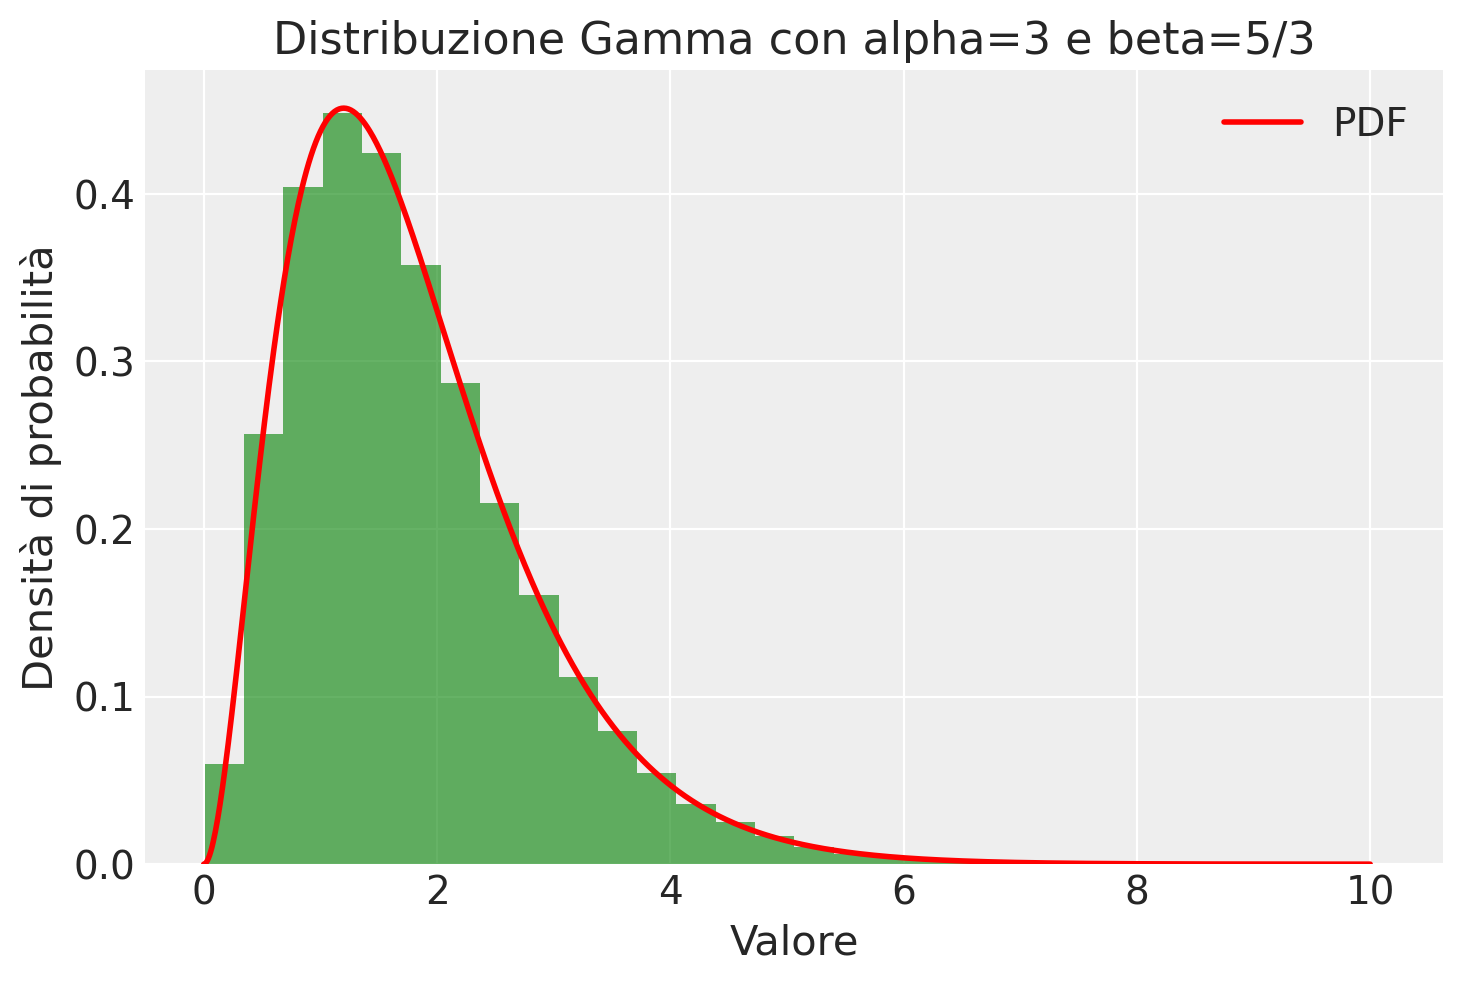

In [82]:
# Generazione di dati dalla distribuzione Gamma
data = rng.gamma(shape=alpha, scale=1/beta, size=100000)

# Plot dell'istogramma dei dati generati
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')

# Plot della PDF (Probability Density Function) della distribuzione Gamma
x = np.linspace(0, 10, 1000)
plt.plot(x, stats.gamma.pdf(x, a=alpha, scale=1/beta), 'r-', lw=2, label='PDF')

plt.xlabel('Valore')
plt.ylabel('Densità di probabilità')
plt.title('Distribuzione Gamma con alpha=3 e beta=5/3')
plt.legend()
plt.show()

## Distribuzione Esponenziale

La [distribuzione esponenziale](https://it.wikipedia.org/wiki/Distribuzione_esponenziale) è una distribuzione di probabilità continua che descrive la "durata di vita" di un fenomeno che non invecchia (ossia la distribuzione esponenziale è priva di memoria). 

La distribuzione esponenziale (o di Laplace) può anche essere ricavata come la distribuzione di probabilità di una variabile aleatoria definita come somma dei quadrati di due variabili aleatorie normali standardizzate (ossia con valore atteso zero e varianza unitaria); dunque è riconducibile a un caso particolare di distribuzione del chi-quadro, essendo, quest'ultima, la distribuzione di probabilità della variabile aleatoria costruita come la somma dei quadrati di $n$ variabili aleatorie indipendenti normali e standardizzate.

La distribuzione esponenziale con parametro 
${\displaystyle \lambda >0}$, ha funzione di densità di probabilità:

$$
{\displaystyle f(x;\lambda )={\begin{cases}\lambda e^{-\lambda x}&x>0,\\0&x\leq 0.\end{cases}}}.
$$

Una variabile aleatoria con distribuzione esponenziale di parametro ${\displaystyle \lambda }$ ha

- valore atteso ${\displaystyle E[X]=1/\lambda }$,
- varianza ${\displaystyle {\text{Var}}(X)=1/\lambda ^{2}}.$

Per fare un esempio, consideriamo il punteggio totale della scala psicologica di Kessler (K6), una misura standardizzata utilizzata dal NHIS per lo screening del disagio psicologico. La K6 include sei item relativi alla sintomatologia depressiva e ansiosa e valuta il disagio psicologico aspecifico degli ultimi 30 giorni. Gli item sono valutati su una scala Likert a 5 punti, che va da "mai" (=0) a "sempre" (=4). I punteggi totali variano da 0 a 24. Secondo @tomitaka2019distribution, il punteggio totale della K6 segue una distribuzione esponenziale, con punteggi di cut-off per disagio psicologico moderato e grave corrispondenti a punteggi di 5 e 13, rispettivamente. Dallo studio emerge che il punteggio medio del totale della K6 nella popolazione americana è di 2.5. La corrispondente distribuzione esponenziale è rappresentata di seguito.

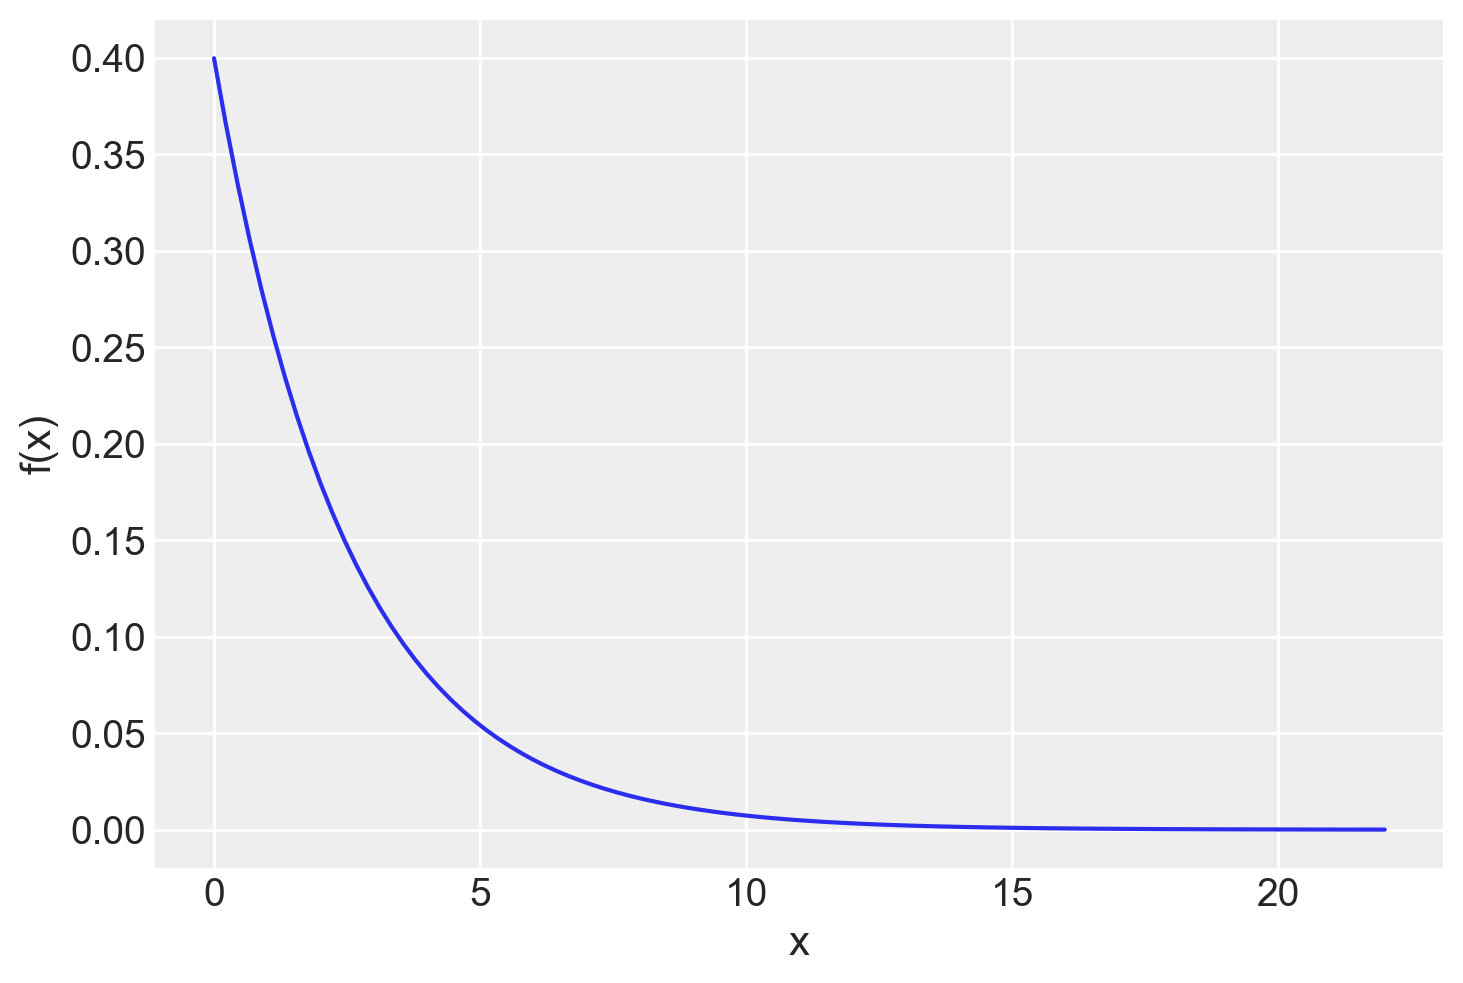

In [17]:
mean = 2.5
x = np.linspace(0.001, 22, 100)
plt.figure()
pdf = stats.expon.pdf(x, scale=mean)
plt.plot(x, pdf, label=r"$\lambda$ = {}".format(lam))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

## Commenti e considerazioni finali 

La statistica bayesiana impiega le distribuzioni di probabilità come motore inferenziale per la stima dei parametri e dell'incertezza. Immaginiamo che le distribuzioni di probabilità siano piccoli pezzi di "Lego" con cui possiamo costruire qualsiasi cosa desideriamo. Questo principio si applica analogamente ai modelli statistici bayesiani. Possiamo costruire modelli che vanno dai più semplici ai più complessi, utilizzando le distribuzioni di probabilità e le loro interrelazioni.

Python, oltre al modulo `stats`, offre la capacità di generare campioni casuali da varie distribuzioni di probabilità attraverso il generatore di numeri casuali disponibile in NumPy. Dopo aver importato NumPy con il comando:

```python
import numpy as np
```

è possibile inizializzare il generatore di numeri casuali (`rng`) con un valore di seme (seed) specifico, garantendo così la riproducibilità degli esperimenti:

```python
RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)
```

A questo punto, si possono generare campioni da diverse distribuzioni di probabilità. Ad esempio, per generare un campione dalla distribuzione normale (gaussiana), si può procedere nel seguente modo:

```python
media, deviazione_standard = 0, 1  # Valori per media e deviazione standard
campione_normale = rng.normal(media, deviazione_standard, size=100)
```

In questo esempio, `size=100` indica che vogliamo generare un campione di 100 valori dalla distribuzione. Analogamente, si possono generare campioni da altre distribuzioni di probabilità specificando i relativi parametri:

**Distribuzione Uniforme:**
   Per generare valori da una distribuzione uniforme, definita in un intervallo da `a` a `b`, si può usare:

   ```python
   a, b = 0, 10  # Estremi dell'intervallo
   campione_uniforme = rng.uniform(a, b, size=100)  # Aggiunta del parametro 'size'
   ```

**Distribuzione t di Student:**
   Per ottenere valori dalla distribuzione t di Student, con un dato numero di gradi di libertà:

   ```python
   gradi_libertà = 10  # Gradi di libertà
   campione_t = rng.standard_t(gradi_libertà, size=100)  # Aggiunta del parametro 'size'
   ```

**Distribuzione Beta:**
   Per la distribuzione Beta, specificando i parametri `alpha` e `beta`:

   ```python
   alpha, beta = 2, 5  # Parametri alpha e beta
   campione_beta = rng.beta(alpha, beta, size=100)  # Aggiunta del parametro 'size'
   ```

**Distribuzione Gamma:**
   Infine, per generare un campione dalla distribuzione Gamma, con i parametri di forma e scala:

   ```python
   forma, scala = 2, 1  # Parametri di forma e scala
   campione_gamma = rng.gamma(forma, scala, size=100)  # Aggiunta del parametro 'size'
   ```

In tutti i casi, l'aggiunta del parametro `size` consente di specificare la dimensione del campione desiderato. 

Per analizzare le proprietà statistiche di diverse distribuzioni di probabilità, oltre alla generazione di campioni casuali, si utilizzano le funzioni di densità di probabilità (PDF), le funzioni di ripartizione cumulativa (CDF) e le funzioni quantili. Queste operazioni possono essere effettuate efficacemente utilizzando la libreria SciPy in Python. 

Per determinare la funzione densità di probabilità (PDF), la quale rappresenta la probabilità relativa di osservare un valore all'interno di un intervallo continuo, il procedimento è il seguente. Per la distribuzione normale, ad esempio:

```python
import numpy as np
from scipy.stats import norm, uniform, t, beta, gamma

media, deviazione_standard = 0, 1
x = np.linspace(media - 4*deviazione_standard, media + 4*deviazione_standard, 100)
pdf_normale = norm.pdf(x, loc=media, scale=deviazione_standard)
```

Simili operazioni possono essere effettuate per altre distribuzioni, come mostrato di seguito:

**Distribuzione Uniforme**:
```python
a, b = 0, 10
x = np.linspace(a, b, 100)
pdf_uniforme = uniform.pdf(x, loc=a, scale=b-a)
```

**Distribuzione t di Student**:
```python
gradi_libertà = 10
x = np.linspace(-5, 5, 100)
pdf_t = t.pdf(x, df=gradi_libertà)
```

**Distribuzione Beta**:
```python
alpha, beta_param = 2, 5
x = np.linspace(0, 1, 100)
pdf_beta = beta.pdf(x, alpha, beta_param)
```

**Distribuzione Gamma**:
```python
forma, scala = 2, 1
x = np.linspace(0, 10, 100)
pdf_gamma = gamma.pdf(x, a=forma, scale=scala)
```

Per determinare i quantili, ovvero i valori corrispondenti a specifiche probabilità cumulate nella funzione di distribuzione, si utilizza la funzione `ppf` (Percent Point Function). Ad esempio, per la distribuzione normale:

```python
probabilità = 0.5
quantile_normale = norm.ppf(probabilità, loc=media, scale=deviazione_standard)
```

E per le altre distribuzioni:

**Distribuzione Uniforme**:
```python
quantile_uniforme = uniform.ppf(probabilità, loc=a, scale=b-a)
```

**Distribuzione t di Student**:
```python
quantile_t = t.ppf(probabilità, df=gradi_libertà)
```

**Distribuzione Beta**:
```python
quantile_beta = beta.ppf(probabilità, alpha, beta_param)
```

**Distribuzione Gamma**:
```python
quantile_gamma = gamma.ppf(probabilità, a=forma, scale=scala)
```

Infine, per calcolare la probabilità cumulativa associata a un dato quantile (ovvero la probabilità che una variabile casuale sia minore o uguale a quel quantile), si utilizza la funzione `cdf` (Cumulative Distribution Function). Questo permette di determinare la probabilità che si verifichi un evento entro un certo intervallo di valori per la distribuzione considerata. Ad esempio, per la distribuzione normale:

```python
quantile = 0
probabilità_normale = norm.cdf(quantile, loc=media, scale=deviazione_standard)
```

E analogamente per le altre distribuzioni:

**Distribuzione Uniforme**:
```python
probabilità_uniforme = uniform.cdf(quantile, loc=a, scale=b-a)
```

**Distribuzione t di Student**:
```python
probabilità_t = t.cdf(quantile, df=gradi_libertà)
```

**Distribuzione Beta**:
```python
probabilità_beta = beta.cdf(quantile, alpha, beta_param)
```

**Distribuzione Gamma**:
```python
probabilità_gamma = gamma.cdf(quantile, a=forma, scale=scala)
```



## Esercizi

::: {#exr-cont_rv_distr-1}

Per ciascuna delle distribuzioni di massa di probabilità discusse, utilizza Python per:

- creare un grafico della funzione, scegliendo opportunamente i parametri;
- estrarre un campione di 1000 valori casuali dalla distribuzione e visualizzarlo con un istogramma;
- calcolare la media e la deviazione standard dei campioni e confrontarle con i valori teorici attesi;
- stimare l'intervallo centrale del 94% utilizzando i campioni simulati;
- determinare i quantili della distribuzione per gli ordini 0.05, 0.25, 0.75 e 0.95;
- scegliendo un valore della distribuzione pari alla media più una deviazione standard, calcolare la probabilità che la variabile aleatoria assuma un valore minore o uguale a questo valore.

:::

## Informazioni sull'Ambiente di Sviluppo {.unnumbered}

In [66]:
%load_ext watermark
%watermark -n -u -v -iv -w -m

Last updated: Thu Mar 21 2024

Python implementation: CPython
Python version       : 3.11.8
IPython version      : 8.22.2

Compiler    : Clang 16.0.6 
OS          : Darwin
Release     : 23.4.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit

scipy     : 1.12.0
matplotlib: 3.8.3
seaborn   : 0.13.2
pandas    : 2.2.1
numpy     : 1.26.4
arviz     : 0.17.1

Watermark: 2.4.3

